In [279]:
#importing all required libraries
import pandas as pd 
import os 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from scipy import stats 
from sklearn.metrics import confusion_matrix
from scipy.stats import chi2_contingency 
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import sklearn.feature_selection as fs
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
import datetime
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.dates import DateFormatter
# from sklearn import cross_validation
%matplotlib inline

In [2]:
#getting current path
os.getcwd()

'C:\\Users\\Gursimran\\Desktop\\Project 2'

In [3]:
#Changing directory
os.chdir("F:/")

In [4]:
#checking directory after changing
os.getcwd()

'F:\\'

In [198]:
#Loading Dataset
AbsentData = pd.read_excel("absent.xls")

In [6]:
#Checking shape of a dataset
AbsentData.shape

(740, 21)

In [7]:
#Inspecting first 5 rows of a dataset.
AbsentData.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                26.0               7.0                3        1   
1  36                 0.0               7.0                3        1   
2   3                23.0               7.0                4        1   
3   7                 7.0               7.0                5        1   
4  11                23.0               7.0                5        1   

   Transportation expense  Distance from Residence to Work  Service time  \
0                   289.0                             36.0          13.0   
1                   118.0                             13.0          18.0   
2                   179.0                             51.0          18.0   
3                   279.0                              5.0          14.0   
4                   289.0                             36.0          13.0   

    Age  Work load Average/day             ...              \
0  33.0                239554.0            ...               
1  50.0                239554.0            ...               
2  38.0                239554.0            ...               
3  39.0                239554.0            ...               
4  33.0                239554.0            ...               

   Disciplinary failure  Education  Son  Social drinker  Social smoker  Pet  \
0                   0.0        1.0  2.0             1.0            0.0  1.0   
1                   1.0        1.0  1.0             1.0            0.0  0.0   
2                   0.0        1.0  0.0             1.0            0.0  0.0   
3                   0.0        1.0  2.0             1.0            1.0  0.0   
4                   0.0        1.0  2.0             1.0            0.0  1.0   

   Weight  Height  Body mass index  Absenteeism time in hours  
0    90.0   172.0             30.0                        4.0  
1    98.0   178.0             31.0                        0.0  
2    89.0   170.0             31.0                        2.0  
3    68.0   168.0             24.0                        4.0  
4    90.0   172.0             30.0                        2.0  

[5 rows x 21 columns]

In [8]:
#Inspecting last 5 rows of a dataset.
AbsentData.tail()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
735  11                14.0               7.0                3        1   
736   1                11.0               7.0                3        1   
737   4                 0.0               0.0                3        1   
738   8                 0.0               0.0                4        2   
739  35                 0.0               0.0                6        3   

     Transportation expense  Distance from Residence to Work  Service time  \
735                   289.0                             36.0          13.0   
736                   235.0                             11.0          14.0   
737                   118.0                             14.0          13.0   
738                   231.0                             35.0          14.0   
739                   179.0                             45.0          14.0   

      Age  Work load Average/day             ...              \
735  33.0                264604.0            ...               
736  37.0                264604.0            ...               
737  40.0                271219.0            ...               
738  39.0                271219.0            ...               
739  53.0                271219.0            ...               

     Disciplinary failure  Education  Son  Social drinker  Social smoker  Pet  \
735                   0.0        1.0  2.0             1.0            0.0  1.0   
736                   0.0        3.0  1.0             0.0            0.0  1.0   
737                   0.0        1.0  1.0             1.0            0.0  8.0   
738                   0.0        1.0  2.0             1.0            0.0  2.0   
739                   0.0        1.0  1.0             0.0            0.0  1.0   

     Weight  Height  Body mass index  Absenteeism time in hours  
735    90.0   172.0             30.0                        8.0  
736    88.0   172.0             29.0                        4.0  
737    98.0   170.0             34.0                        0.0  
738   100.0   170.0             35.0                        0.0  
739    77.0   175.0             25.0                        0.0  

[5 rows x 21 columns]

In [9]:
#Checking type of a dataset
type(AbsentData)

pandas.core.frame.DataFrame

In [199]:
#data type of the variables
AbsentData.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [11]:
#Checking Columns Names
list(AbsentData)

['ID',
 'Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Hit target',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet',
 'Weight',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

In [200]:
#Changing name of all variables in a dataset.
AbsentData.rename(columns={'ID':'Id'}, inplace=True)
AbsentData.rename(columns={'Seasons':'Season'}, inplace=True)
AbsentData.rename(columns={'Reason for absence':'AbsentReason'}, inplace=True)
AbsentData.rename(columns={'Month of absence':'AbsentMonth'}, inplace=True)
AbsentData.rename(columns={'Day of the week':'WeekDay'}, inplace=True)
AbsentData.rename(columns={'Transportation expense':'Expenses'}, inplace=True)
AbsentData.rename(columns={'Distance from Residence to Work':'ResidentDistance'}, inplace=True)
AbsentData.rename(columns={'Service time':'ServiceTime'}, inplace=True)
AbsentData.rename(columns={'Age':'Age'}, inplace=True)
AbsentData.rename(columns={'Work load Average/day ':'AverageWorkLoad'}, inplace=True)
AbsentData.rename(columns={'Hit target':'HitTarget'}, inplace=True)
AbsentData.rename(columns={'Disciplinary failure':'DiscplineFailure'}, inplace=True)
AbsentData.rename(columns={'Education':'Education'}, inplace=True)
AbsentData.rename(columns={'Social drinker':'SocialDrinker'}, inplace=True)
AbsentData.rename(columns={'Social smoker':'SocialSmoker'}, inplace=True)
AbsentData.rename(columns={'Pet':'Pet'}, inplace=True)
AbsentData.rename(columns={'Weight':'Weight'}, inplace=True)
AbsentData.rename(columns={'Height':'Height'}, inplace=True)
AbsentData.rename(columns={'Body mass index':'BodyMassIndex'}, inplace=True)
AbsentData.rename(columns={'Absenteeism time in hours':'AbsentTime'}, inplace=True)

In [13]:
AbsentData.head()

Id  AbsentReason  AbsentMonth  WeekDay  Season  Expenses  ResidentDistance  \
0  11          26.0          7.0        3       1     289.0              36.0   
1  36           0.0          7.0        3       1     118.0              13.0   
2   3          23.0          7.0        4       1     179.0              51.0   
3   7           7.0          7.0        5       1     279.0               5.0   
4  11          23.0          7.0        5       1     289.0              36.0   

   ServiceTime   Age  AverageWorkLoad     ...      DiscplineFailure  \
0         13.0  33.0         239554.0     ...                   0.0   
1         18.0  50.0         239554.0     ...                   1.0   
2         18.0  38.0         239554.0     ...                   0.0   
3         14.0  39.0         239554.0     ...                   0.0   
4         13.0  33.0         239554.0     ...                   0.0   

   Education  Son  SocialDrinker  SocialSmoker  Pet  Weight  Height  \
0        1.0  2.0            1.0           0.0  1.0    90.0   172.0   
1        1.0  1.0            1.0           0.0  0.0    98.0   178.0   
2        1.0  0.0            1.0           0.0  0.0    89.0   170.0   
3        1.0  2.0            1.0           1.0  0.0    68.0   168.0   
4        1.0  2.0            1.0           0.0  1.0    90.0   172.0   

   BodyMassIndex  AbsentTime  
0           30.0         4.0  
1           31.0         0.0  
2           31.0         2.0  
3           24.0         4.0  
4           30.0         2.0  

[5 rows x 21 columns]

In [14]:
#Getting Maximum value of Absent Reason
AbsentData['AbsentReason'].max()

28.0

In [15]:
#Getting Minimum value of Absent Reason
AbsentData['AbsentReason'].min()

0.0

In [201]:
#Replacining 0.0 to 1.0 as there is no information availabe from the dataset describtion
AbsentData['AbsentReason'].replace(0.0, 1.0,inplace=True)

In [17]:
#Getting Maximum value of Absent Month
AbsentData['AbsentMonth'].max()

12.0

In [18]:
#Getting Minimum value of Absent Month
AbsentData['AbsentMonth'].min()

0.0

In [202]:
#Replacining 0.0 to 1.0 as there is no information availabe from the dataset describtion
AbsentData['AbsentMonth'].replace(0.0, 1.0,inplace=True)

In [20]:
#Getting Maximum value of WeekDay
AbsentData['WeekDay'].max()

6

In [21]:
#Getting Minimum value of WeekDay
AbsentData['WeekDay'].min()

2

In [22]:
#Getting Maximum value of Season
AbsentData['Season'].max()

4

In [23]:
#Getting Minimum value of Season
AbsentData['Season'].min()

1

In [24]:
#Getting Maximum value of Education
AbsentData['Education'].max()

4.0

In [25]:
#Getting Minimum value of Education
AbsentData['Education'].min()

1.0

In [203]:
#Converting Categorica variables to correct format
category_variables = ['AbsentReason', 'AbsentMonth', 'WeekDay', 'DiscplineFailure','Season',
                      'Education', 'Son', 'SocialDrinker', 'SocialSmoker', 'Pet', 'Id']
AbsentData[category_variables] = AbsentData[category_variables].apply(pd.Series.astype, dtype = 'category')


In [27]:
AbsentData.dtypes

Id                  category
AbsentReason        category
AbsentMonth         category
WeekDay             category
Season              category
Expenses             float64
ResidentDistance     float64
ServiceTime          float64
Age                  float64
AverageWorkLoad      float64
HitTarget            float64
DiscplineFailure    category
Education           category
Son                 category
SocialDrinker       category
SocialSmoker        category
Pet                 category
Weight               float64
Height               float64
BodyMassIndex        float64
AbsentTime           float64
dtype: object

In [28]:
#Inspecting last 5 rows of dataset after renaming variable names.
AbsentData.tail()

Id AbsentReason AbsentMonth WeekDay Season  Expenses  ResidentDistance  \
735  11         14.0         7.0       3      1     289.0              36.0   
736   1         11.0         7.0       3      1     235.0              11.0   
737   4          1.0         1.0       3      1     118.0              14.0   
738   8          1.0         1.0       4      2     231.0              35.0   
739  35          1.0         1.0       6      3     179.0              45.0   

     ServiceTime   Age  AverageWorkLoad     ...      DiscplineFailure  \
735         13.0  33.0         264604.0     ...                   0.0   
736         14.0  37.0         264604.0     ...                   0.0   
737         13.0  40.0         271219.0     ...                   0.0   
738         14.0  39.0         271219.0     ...                   0.0   
739         14.0  53.0         271219.0     ...                   0.0   

    Education  Son SocialDrinker SocialSmoker  Pet Weight  Height  \
735       1.0  2.0           1.0          0.0  1.0   90.0   172.0   
736       3.0  1.0           0.0          0.0  1.0   88.0   172.0   
737       1.0  1.0           1.0          0.0  8.0   98.0   170.0   
738       1.0  2.0           1.0          0.0  2.0  100.0   170.0   
739       1.0  1.0           0.0          0.0  1.0   77.0   175.0   

     BodyMassIndex  AbsentTime  
735           30.0         8.0  
736           29.0         4.0  
737           34.0         0.0  
738           35.0         0.0  
739           25.0         0.0  

[5 rows x 21 columns]

In [29]:
#Inspecting frst 5 rows of dataset after renaming variable names.
AbsentData.head()

Id AbsentReason AbsentMonth WeekDay Season  Expenses  ResidentDistance  \
0  11         26.0         7.0       3      1     289.0              36.0   
1  36          1.0         7.0       3      1     118.0              13.0   
2   3         23.0         7.0       4      1     179.0              51.0   
3   7          7.0         7.0       5      1     279.0               5.0   
4  11         23.0         7.0       5      1     289.0              36.0   

   ServiceTime   Age  AverageWorkLoad     ...      DiscplineFailure Education  \
0         13.0  33.0         239554.0     ...                   0.0       1.0   
1         18.0  50.0         239554.0     ...                   1.0       1.0   
2         18.0  38.0         239554.0     ...                   0.0       1.0   
3         14.0  39.0         239554.0     ...                   0.0       1.0   
4         13.0  33.0         239554.0     ...                   0.0       1.0   

   Son SocialDrinker SocialSmoker  Pet Weight  Height  BodyMassIndex  \
0  2.0           1.0          0.0  1.0   90.0   172.0           30.0   
1  1.0           1.0          0.0  0.0   98.0   178.0           31.0   
2  0.0           1.0          0.0  0.0   89.0   170.0           31.0   
3  2.0           1.0          1.0  0.0   68.0   168.0           24.0   
4  2.0           1.0          0.0  1.0   90.0   172.0           30.0   

   AbsentTime  
0         4.0  
1         0.0  
2         2.0  
3         4.0  
4         2.0  

[5 rows x 21 columns]

In [30]:
#Inspecting statistical terms on Dataset.
AbsentData.describe()

Expenses  ResidentDistance  ServiceTime         Age  AverageWorkLoad  \
count  733.000000        737.000000   737.000000  737.000000       730.000000   
mean   221.035471         29.667571    12.565807   36.449118    271188.860274   
std     66.954179         14.848124     4.389813    6.480148     38981.880873   
min    118.000000          5.000000     1.000000   27.000000    205917.000000   
25%    179.000000         16.000000     9.000000   31.000000    244387.000000   
50%    225.000000         26.000000    13.000000   37.000000    264249.000000   
75%    260.000000         50.000000    16.000000   40.000000    284853.000000   
max    388.000000         52.000000    29.000000   58.000000    378884.000000   

        HitTarget      Weight      Height  BodyMassIndex  AbsentTime  
count  734.000000  739.000000  726.000000     709.000000  718.000000  
mean    94.587193   79.063599  172.152893      26.684062    6.977716  
std      3.792705   12.868630    6.081065       4.292819   13.476962  
min     81.000000   56.000000  163.000000      19.000000    0.000000  
25%     93.000000   69.000000  169.000000      24.000000    2.000000  
50%     95.000000   83.000000  170.000000      25.000000    3.000000  
75%     97.000000   89.000000  172.000000      31.000000    8.000000  
max    100.000000  108.000000  196.000000      38.000000  120.000000

In [31]:
#Important Variabes
AbsentData.Id.nunique()

36

In [204]:
NumberOfAbsent = AbsentData['AbsentTime'].loc[(AbsentData['AbsentTime'] == 0)]
print("Rows without Absent Time = %d" %(NumberOfAbsent.count()))

#max and min absent hours
print('Maximum Absent Time: %d  and Minimum Absent Time:  %d'%(AbsentData['AbsentTime'].max(), 
                                                                    AbsentData['AbsentTime'].min()))

Rows without Absent Time = 36
Maximum Absent Time: 120  and Minimum Absent Time:  0


In [33]:
#Checking Missing Values
AbsentData.isnull().values.any()
#Missing Values exsists.

True

In [205]:
#GEtting sum of all missing values
AbsentData.isnull().sum()

Id                   0
AbsentReason         3
AbsentMonth          1
WeekDay              0
Season               0
Expenses             7
ResidentDistance     3
ServiceTime          3
Age                  3
AverageWorkLoad     10
HitTarget            6
DiscplineFailure     6
Education           10
Son                  6
SocialDrinker        3
SocialSmoker         4
Pet                  2
Weight               1
Height              14
BodyMassIndex       31
AbsentTime          22
dtype: int64

In [35]:
#Calculating Missing Value Percentage
#Create dataframe with missing percentage
missing_val = pd.DataFrame(AbsentData.isnull().sum())
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'MissingPercentage'})
missing_val['MissingPercentage'] = (missing_val['MissingPercentage']/len(AbsentData))*100
missing_val = missing_val.sort_values('MissingPercentage', ascending = False).reset_index(drop = True)
missing_val

Variables  MissingPercentage
0      BodyMassIndex           4.189189
1         AbsentTime           2.972973
2             Height           1.891892
3    AverageWorkLoad           1.351351
4          Education           1.351351
5           Expenses           0.945946
6                Son           0.810811
7   DiscplineFailure           0.810811
8          HitTarget           0.810811
9       SocialSmoker           0.540541
10               Age           0.405405
11      AbsentReason           0.405405
12       ServiceTime           0.405405
13  ResidentDistance           0.405405
14     SocialDrinker           0.405405
15               Pet           0.270270
16            Weight           0.135135
17       AbsentMonth           0.135135
18            Season           0.000000
19           WeekDay           0.000000
20                Id           0.000000

In [206]:
#Imputing Missing values using Mean
AbsentData['BodyMassIndex'] = AbsentData['BodyMassIndex'].fillna(AbsentData['BodyMassIndex'].mean())
AbsentData['AbsentTime'] = AbsentData['AbsentTime'].fillna(AbsentData['AbsentTime'].mean())
AbsentData['Height'] = AbsentData['Height'].fillna(AbsentData['Height'].mean())
AbsentData['Weight'] = AbsentData['Weight'].fillna(AbsentData['Weight'].mean())
AbsentData['ServiceTime'] = AbsentData['ServiceTime'].fillna(AbsentData['ServiceTime'].mean())
AbsentData['AverageWorkLoad'] = AbsentData['AverageWorkLoad'].fillna(AbsentData['AverageWorkLoad'].mean())
AbsentData['HitTarget'] = AbsentData['HitTarget'].fillna(AbsentData['HitTarget'].mean())
#DRopping other missing values as their percentage s very low
AbsentData.dropna(inplace=True)

In [207]:
#Checking Missing Values exsits after filling or not.
AbsentData.isnull().any()
#ALL Missing Values are filled.

Id                  False
AbsentReason        False
AbsentMonth         False
WeekDay             False
Season              False
Expenses            False
ResidentDistance    False
ServiceTime         False
Age                 False
AverageWorkLoad     False
HitTarget           False
DiscplineFailure    False
Education           False
Son                 False
SocialDrinker       False
SocialSmoker        False
Pet                 False
Weight              False
Height              False
BodyMassIndex       False
AbsentTime          False
dtype: bool

In [38]:
AbsentData.describe()

Expenses  ResidentDistance  ServiceTime         Age  AverageWorkLoad  \
count  701.000000        701.000000   701.000000  701.000000       701.000000   
mean   221.567760         29.737518    12.627055   36.534950    270635.697407   
std     66.213033         14.752613     4.395402    6.570974     38754.582509   
min    118.000000          5.000000     1.000000   27.000000    205917.000000   
25%    179.000000         16.000000     9.000000   31.000000    244387.000000   
50%    225.000000         26.000000    13.000000   37.000000    264249.000000   
75%    260.000000         50.000000    16.000000   40.000000    284853.000000   
max    388.000000         52.000000    29.000000   58.000000    378884.000000   

        HitTarget      Weight      Height  BodyMassIndex  AbsentTime  
count  701.000000  701.000000  701.000000     701.000000  701.000000  
mean    94.650159   79.154156  172.161735      26.722045    7.016483  
std      3.750946   12.957477    6.035594       4.257202   13.523304  
min     81.000000   56.000000  163.000000      19.000000    0.000000  
25%     93.000000   69.000000  169.000000      24.000000    2.000000  
50%     95.000000   83.000000  170.000000      25.000000    3.000000  
75%     98.000000   89.000000  172.000000      31.000000    8.000000  
max    100.000000  108.000000  196.000000      38.000000  120.000000

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    701.000000
mean       7.016483
std       13.523304
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      120.000000
Name: AbsentTime, dtype: float64

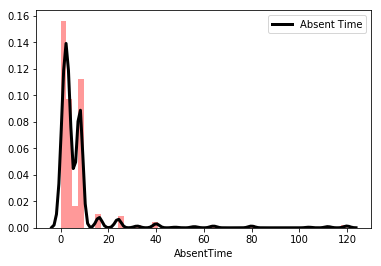

In [39]:
#Univariate Analysis of Numerical Attributes
#Absent Time (Target Variable)
sns.distplot(AbsentData['AbsentTime'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Absent Time"}) 
AbsentData['AbsentTime'].describe()

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    701.000000
mean      26.722045
std        4.257202
min       19.000000
25%       24.000000
50%       25.000000
75%       31.000000
max       38.000000
Name: BodyMassIndex, dtype: float64

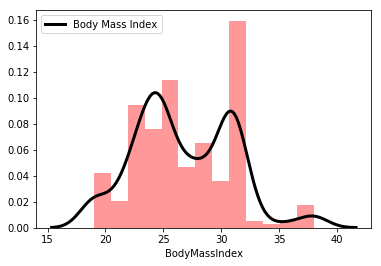

In [38]:
#Check BodyMassIndex
sns.distplot(AbsentData['BodyMassIndex'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Body Mass Index"})  
AbsentData['BodyMassIndex'].describe()

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    701.000000
mean     172.161735
std        6.035594
min      163.000000
25%      169.000000
50%      170.000000
75%      172.000000
max      196.000000
Name: Height, dtype: float64

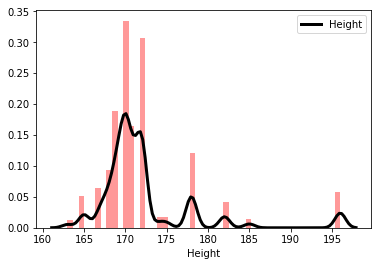

In [39]:
#Check Height
sns.distplot(AbsentData['Height'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Height"})  
AbsentData['Height'].describe()

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    701.000000
mean      79.154156
std       12.957477
min       56.000000
25%       69.000000
50%       83.000000
75%       89.000000
max      108.000000
Name: Weight, dtype: float64

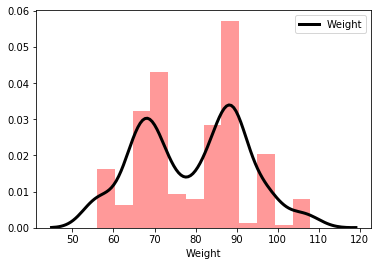

In [40]:
#Check Weight
sns.distplot(AbsentData['Weight'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Weight"})  
AbsentData['Weight'].describe()

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    701.000000
mean      94.650159
std        3.750946
min       81.000000
25%       93.000000
50%       95.000000
75%       98.000000
max      100.000000
Name: HitTarget, dtype: float64

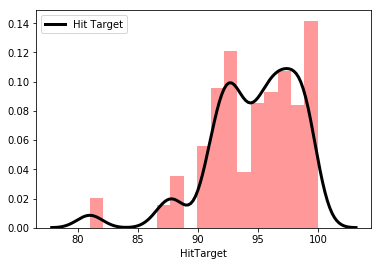

In [41]:
#Check HitTarget
sns.distplot(AbsentData['HitTarget'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Hit Target"})  
AbsentData['HitTarget'].describe()

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    701.000000
mean     221.567760
std       66.213033
min      118.000000
25%      179.000000
50%      225.000000
75%      260.000000
max      388.000000
Name: Expenses, dtype: float64

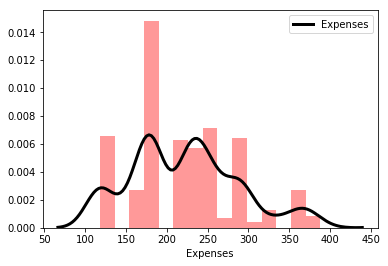

In [42]:
#Check Expenses
sns.distplot(AbsentData['Expenses'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Expenses"})  
AbsentData['Expenses'].describe()

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count       701.000000
mean     270635.697407
std       38754.582509
min      205917.000000
25%      244387.000000
50%      264249.000000
75%      284853.000000
max      378884.000000
Name: AverageWorkLoad, dtype: float64

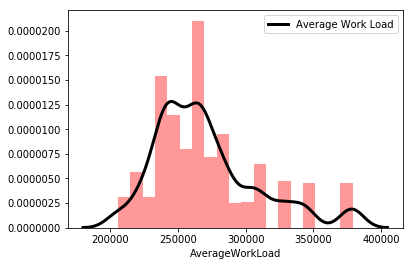

In [43]:
#Check AverageWorkLoad
sns.distplot(AbsentData['AverageWorkLoad'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Average Work Load"})  
AbsentData['AverageWorkLoad'].describe()

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    701.000000
mean      36.534950
std        6.570974
min       27.000000
25%       31.000000
50%       37.000000
75%       40.000000
max       58.000000
Name: Age, dtype: float64

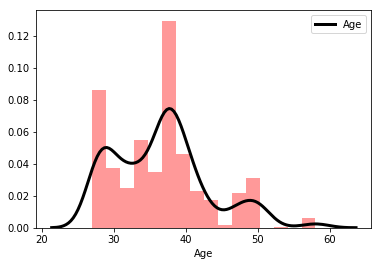

In [44]:
#Check Age
sns.distplot(AbsentData['Age'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Age"})  
AbsentData['Age'].describe()

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    701.000000
mean      12.627055
std        4.395402
min        1.000000
25%        9.000000
50%       13.000000
75%       16.000000
max       29.000000
Name: ServiceTime, dtype: float64

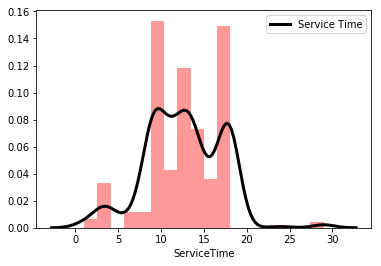

In [45]:
#Check ServiceTime
sns.distplot(AbsentData['ServiceTime'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Service Time"})  
AbsentData['ServiceTime'].describe()

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    701.000000
mean      29.737518
std       14.752613
min        5.000000
25%       16.000000
50%       26.000000
75%       50.000000
max       52.000000
Name: ResidentDistance, dtype: float64

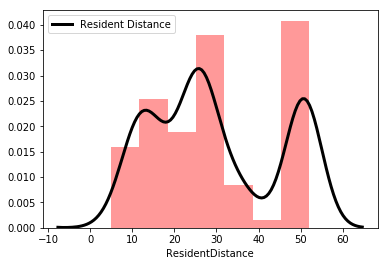

In [46]:
#Check ResidentDistance
sns.distplot(AbsentData['ResidentDistance'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Resident Distance"})  
AbsentData['ResidentDistance'].describe()

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


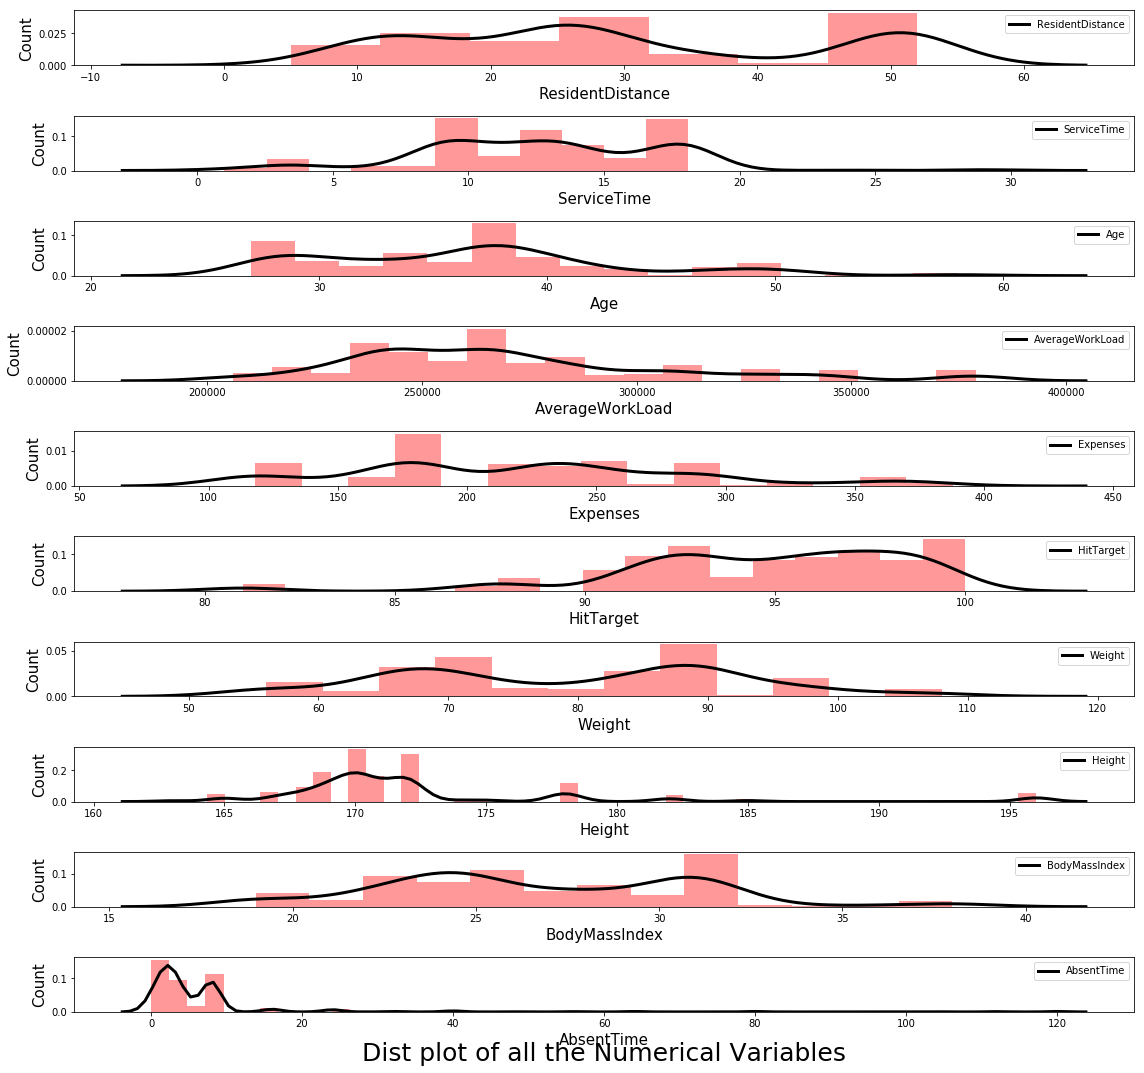

In [47]:
#Plotting Distribution plot for all numeric variables in the dataset.
col_names = ['ResidentDistance','ServiceTime','Age','AverageWorkLoad','Expenses','HitTarget','Weight','Height','BodyMassIndex','AbsentTime']
fig, ax = plt.subplots(len(col_names), figsize=(16,15))
plt.title("Dist plot of all the Numerical Variables",x=0.5,y=-1,fontsize=25)
for i, col_val in enumerate(col_names):
    sns.distplot(AbsentData[col_val], hist=True, ax=ax[i],color='red',kde_kws={"color": "k", "lw": 3, "label":col_val})
    ax[i].set_xlabel(col_val, fontsize=15)
    ax[i].set_ylabel('Count', fontsize=15)
    plt.tight_layout()
plt.show()


In [143]:
#Skewness and Kurtosis of Absent Time
print("Skewness: %f" % AbsentData['AbsentTime'].skew())
print("Kurtosis: %f" % AbsentData['AbsentTime'].kurt())

Skewness: 5.738526
Kurtosis: 38.453107


In [144]:
#Skewness and Kurtosis of Body Mass Index
print("Skewness: %f" % AbsentData['BodyMassIndex'].skew())
print("Kurtosis: %f" % AbsentData['BodyMassIndex'].kurt())

Skewness: 0.297075
Kurtosis: -0.260639


In [145]:
#Skewness and Kurtosis of Height
print("Skewness: %f" % AbsentData['Height'].skew())
print("Kurtosis: %f" % AbsentData['Height'].kurt())

Skewness: 2.514707
Kurtosis: 7.101933


In [146]:
#Skewness and Kurtosis of Weight
print("Skewness: %f" % AbsentData['Weight'].skew())
print("Kurtosis: %f" % AbsentData['Weight'].kurt())

Skewness: 0.021913
Kurtosis: -0.922509


In [147]:
#Skewness and Kurtosis of HiTarget
print("Skewness: %f" % AbsentData['HitTarget'].skew())
print("Kurtosis: %f" % AbsentData['HitTarget'].kurt())

Skewness: -1.212808
Kurtosis: 2.220821


In [148]:
#Skewness and Kurtosis of Expenses
print("Skewness: %f" % AbsentData['Expenses'].skew())
print("Kurtosis: %f" % AbsentData['Expenses'].kurt())

Skewness: 0.399037
Kurtosis: -0.282759


In [149]:
#Skewness and Kurtosis of Average Work Load
print("Skewness: %f" % AbsentData['AverageWorkLoad'].skew())
print("Kurtosis: %f" % AbsentData['AverageWorkLoad'].kurt())

Skewness: 1.004184
Kurtosis: 0.739177


In [150]:
#Skewness and Kurtosis of Age
print("Skewness: %f" % AbsentData['Age'].skew())
print("Kurtosis: %f" % AbsentData['Age'].kurt())

Skewness: 0.691881
Kurtosis: 0.352631


In [151]:
#Skewness and Kurtosis of ServiceTime
print("Skewness: %f" % AbsentData['ServiceTime'].skew())
print("Kurtosis: %f" % AbsentData['ServiceTime'].kurt())

Skewness: 0.001350
Kurtosis: 0.700683


In [152]:
#Skewness and Kurtosis of Residence Distance
print("Skewness: %f" % AbsentData['ResidentDistance'].skew())
print("Kurtosis: %f" % AbsentData['ResidentDistance'].kurt())

Skewness: 0.313303
Kurtosis: -1.255336


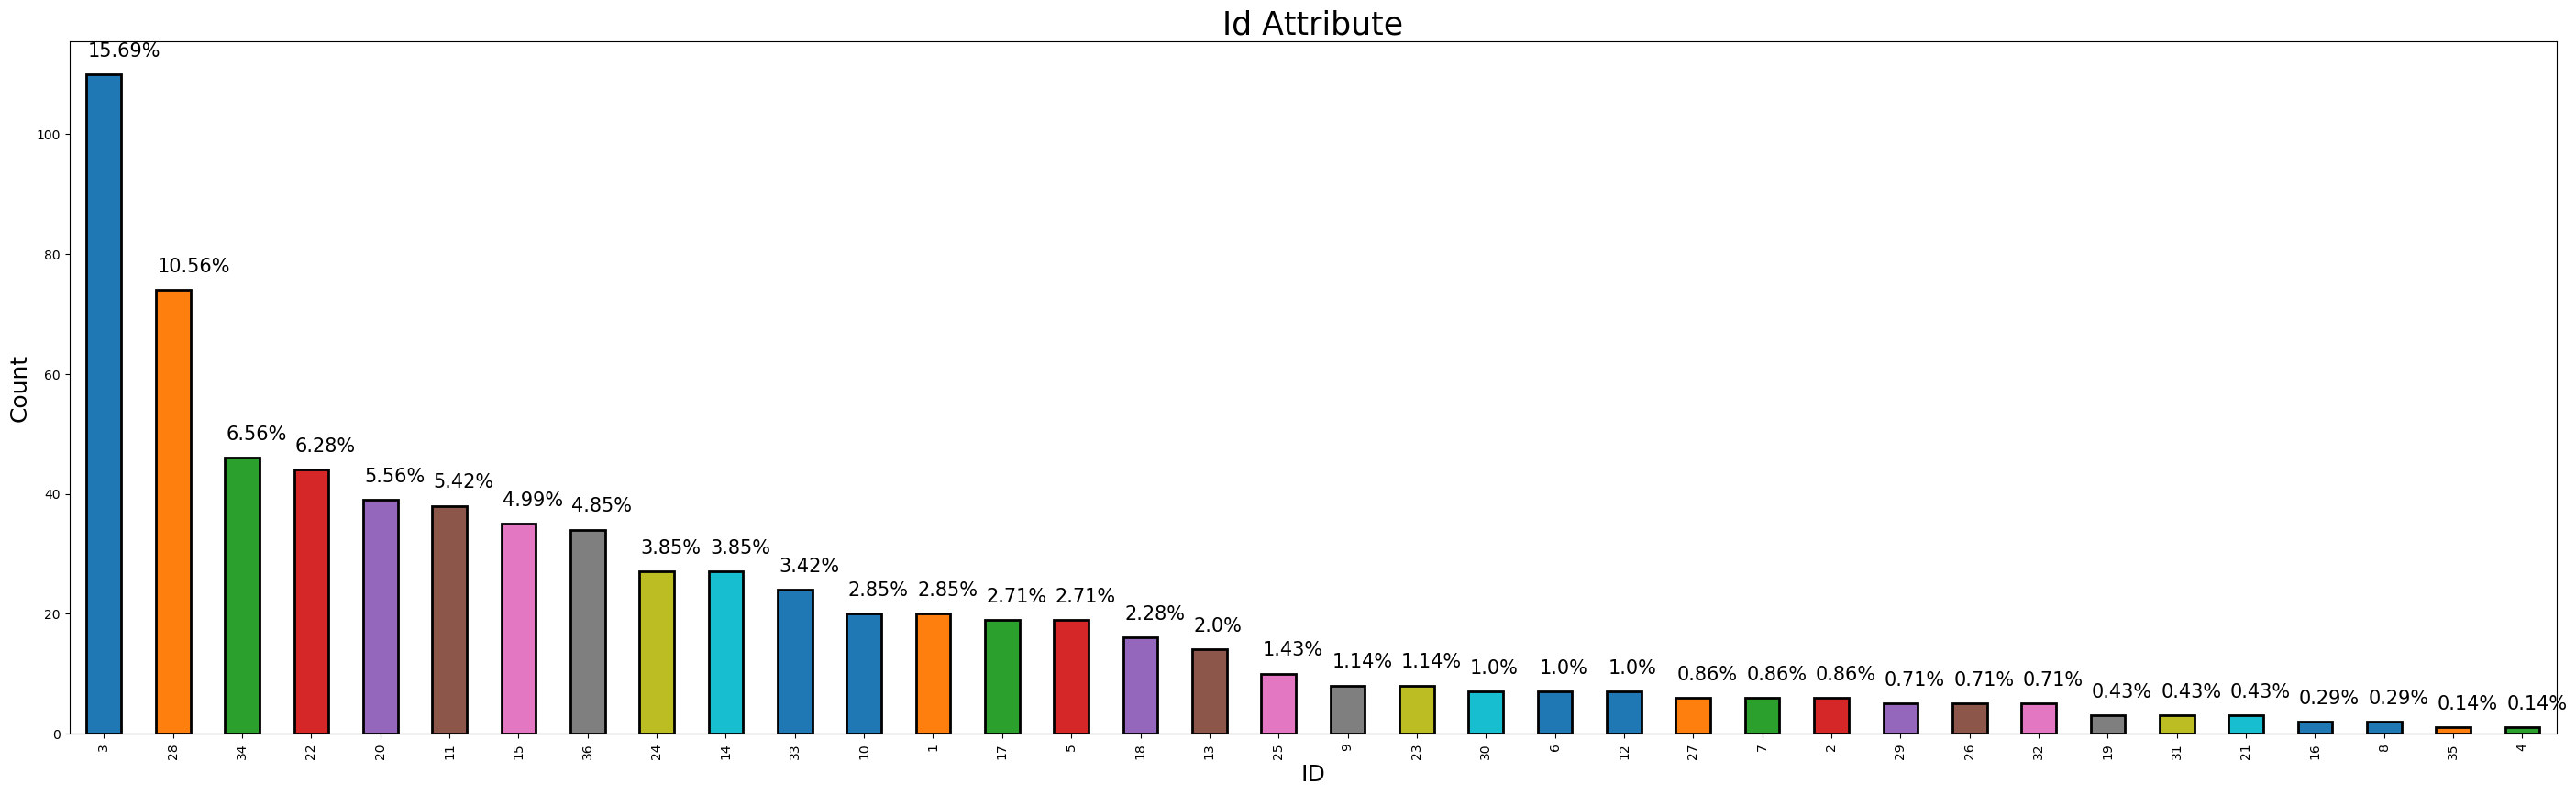

In [40]:
#Univariate analysis of categorical variables.
#Id attribute
fig=plt.figure(figsize=(35,10), dpi= 100, facecolor='w', edgecolor='k')
ax = AbsentData['Id'].value_counts().plot(kind='bar',align='center',edgecolor='black',linewidth=2)
ax.set_alpha(1)
ax.set_title("Id Attribute", fontsize=25)
ax.set_xlabel("ID", fontsize=18);
ax.set_ylabel("Count", fontsize=18);
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.02, i.get_height()+3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

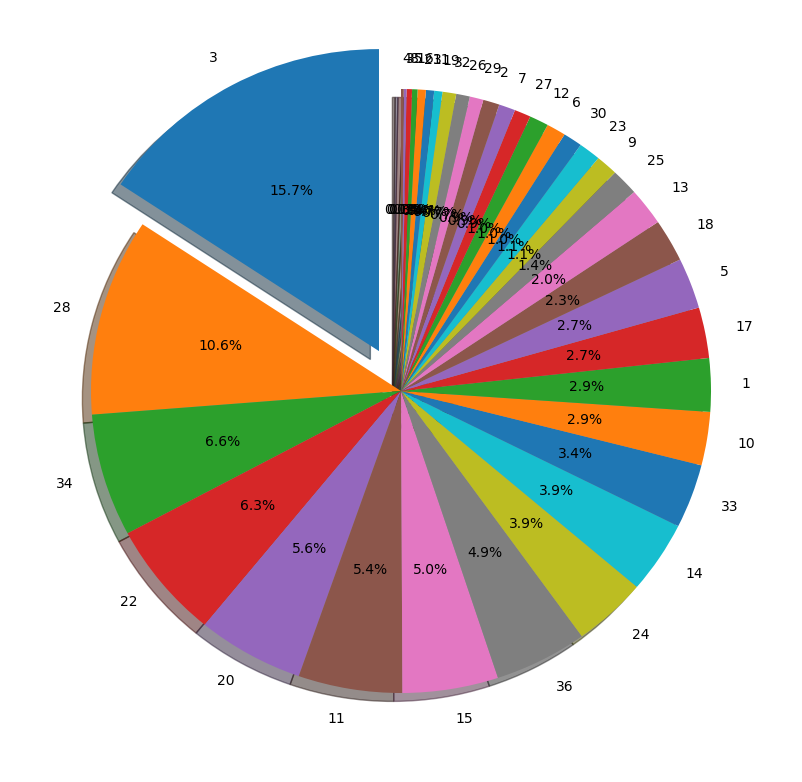

In [75]:
#Id Attribute Pie chart
fig=plt.figure(figsize=(10,10), dpi= 100, facecolor='w', edgecolor='k')
df = pd.DataFrame(AbsentData['Id'])
df = pd.value_counts(df.Id).to_frame().reset_index()
df.columns = ['Id','Count']
plt.pie(
    df['Count'],
    labels=df['Id'],
    shadow=True,
    explode=(0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.show()

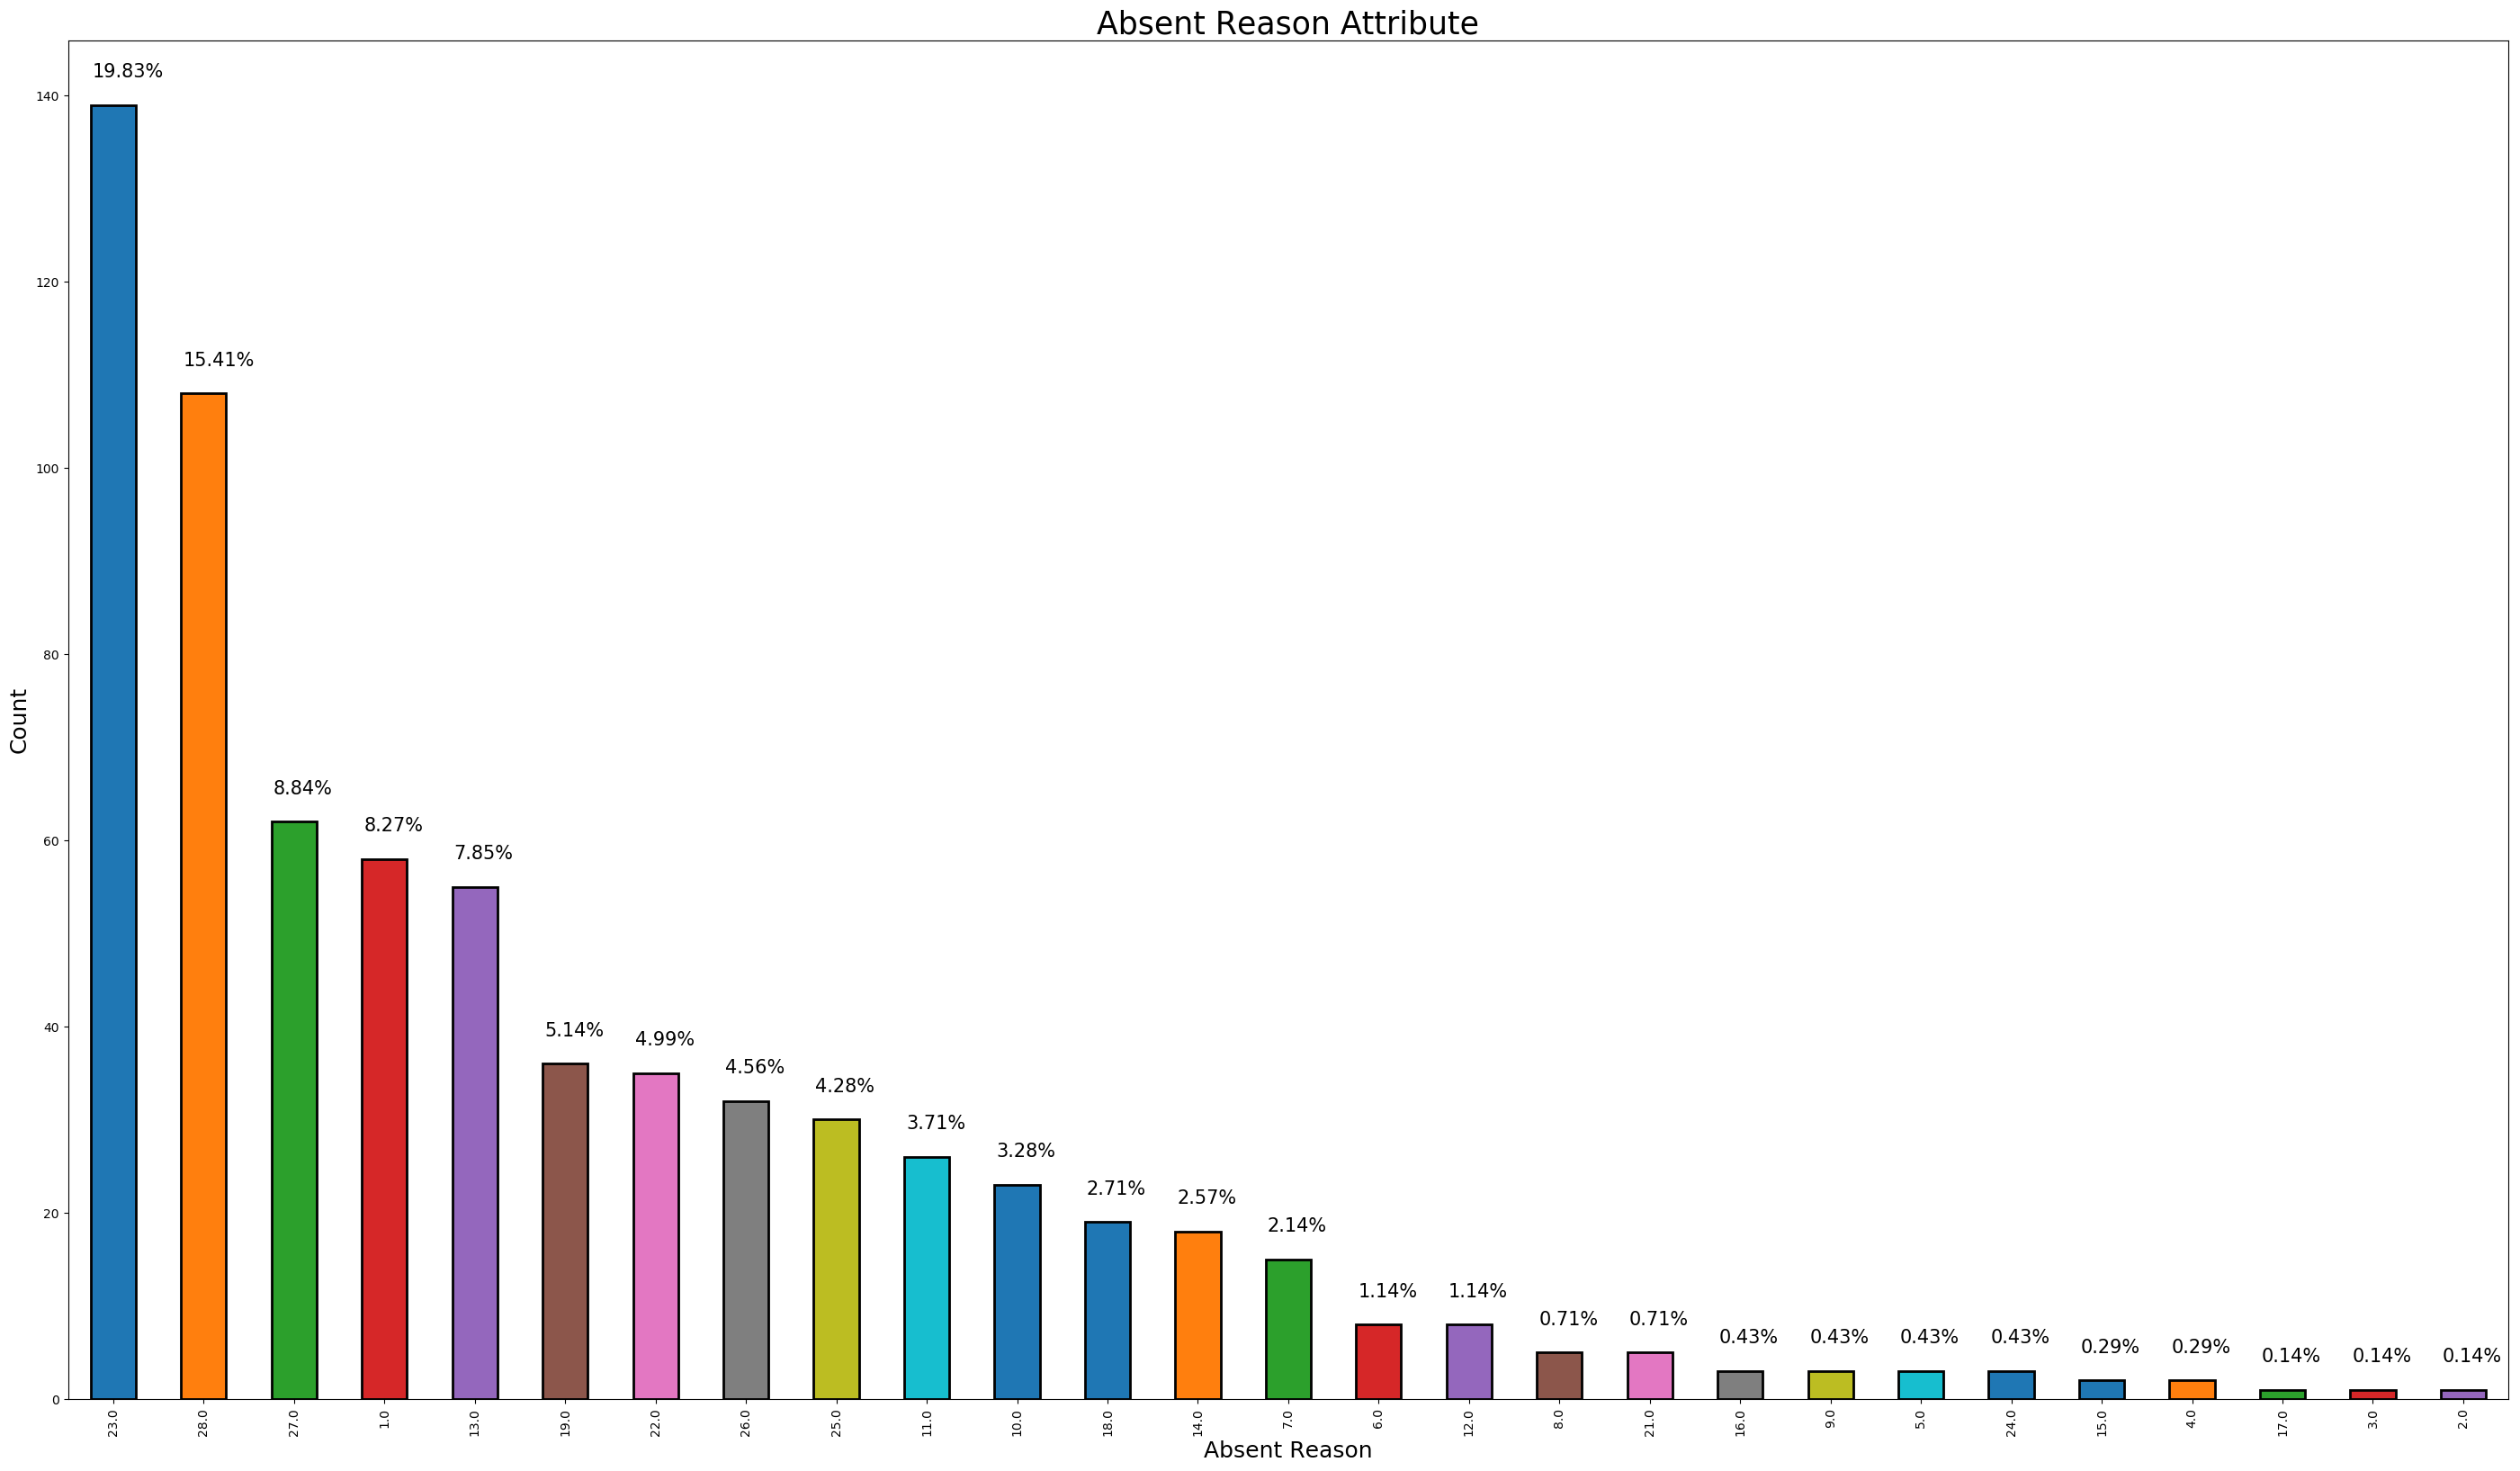

In [76]:
#Absent Reason Attribute
fig=plt.figure(figsize=(35,20), dpi= 100, facecolor='w', edgecolor='k')
ax = AbsentData['AbsentReason'].value_counts().plot(kind='bar',align='center',edgecolor='black',linewidth=2)
ax.set_alpha(1)
ax.set_title("Absent Reason Attribute", fontsize=25)
ax.set_xlabel("Absent Reason", fontsize=18);
ax.set_ylabel("Count", fontsize=18);
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.02, i.get_height()+3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

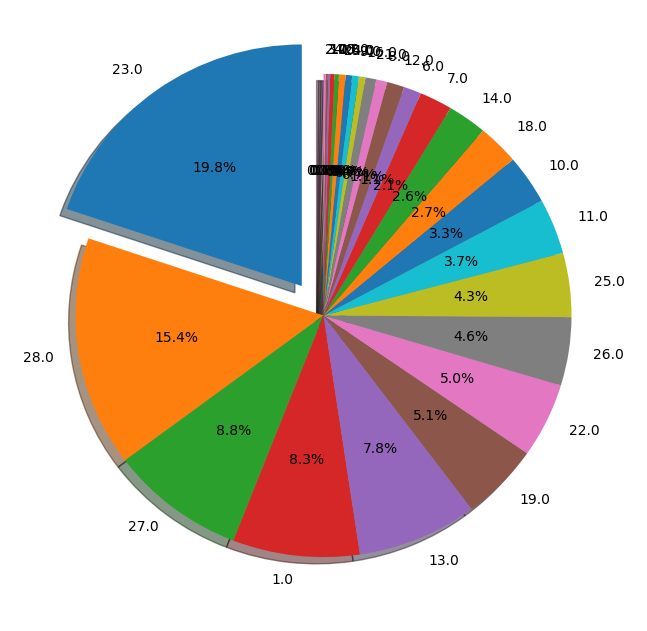

In [78]:
#AbsentReason Attribute Pie chart
AbsentData['AbsentReason'] = AbsentData['AbsentReason'].replace(0.0,1.0)
fig=plt.figure(figsize=(8,8), dpi= 100, facecolor='w', edgecolor='k')
df = pd.DataFrame(AbsentData['AbsentReason'])
df = pd.value_counts(df.AbsentReason).to_frame().reset_index()
df.columns = ['AbsentReason','Count']
plt.pie(
    df['Count'],
    labels=df['AbsentReason'],
    shadow=True,
    explode=(0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.show()

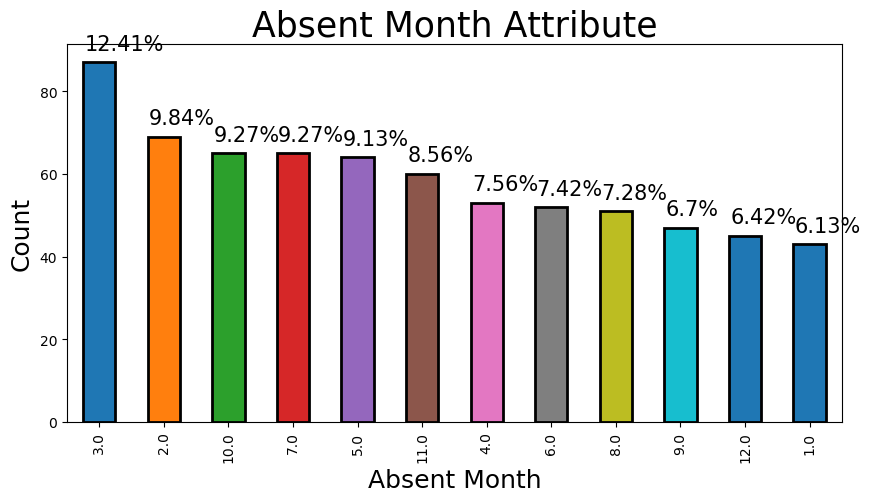

In [79]:
#Absent Month Attribute
AbsentData['AbsentMonth'] = AbsentData['AbsentMonth'].replace(0.0,1.0)
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
ax = AbsentData['AbsentMonth'].value_counts().plot(kind='bar',align='center',edgecolor='black',linewidth=2)
ax.set_alpha(1)
ax.set_title("Absent Month Attribute", fontsize=25)
ax.set_xlabel("Absent Month", fontsize=18);
ax.set_ylabel("Count", fontsize=18);
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.02, i.get_height()+3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

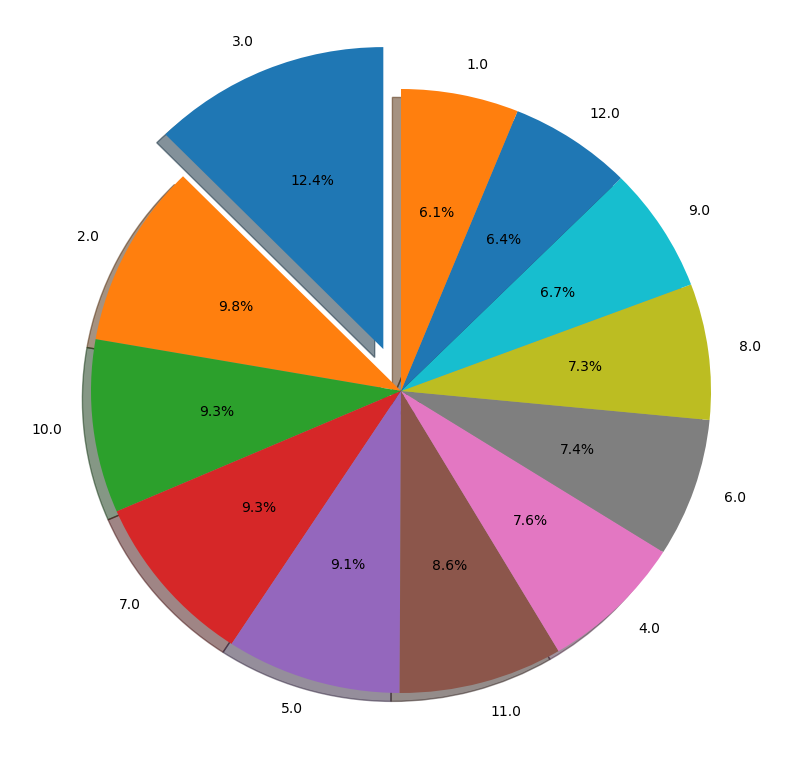

In [80]:
#AbsentMonth Attribute Pie chart
fig=plt.figure(figsize=(10,10), dpi= 100, facecolor='w', edgecolor='k')
df = pd.DataFrame(AbsentData['AbsentMonth'])
df = pd.value_counts(df.AbsentMonth).to_frame().reset_index()
df.columns = ['AbsentMonth','Count']
plt.pie(
    df['Count'],
    labels=df['AbsentMonth'],
    shadow=True,
    explode=(0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.show()

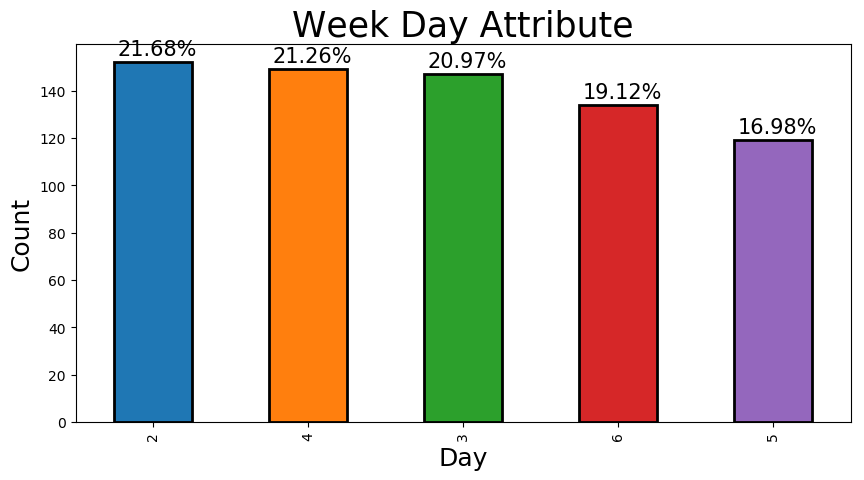

In [81]:
#Absent WeekDay Attribute
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
ax = AbsentData['WeekDay'].value_counts().plot(kind='bar',align='center',edgecolor='black',linewidth=2)
ax.set_alpha(1)
ax.set_title("Week Day Attribute", fontsize=25)
ax.set_xlabel("Day", fontsize=18);
ax.set_ylabel("Count", fontsize=18);
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.02, i.get_height()+3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

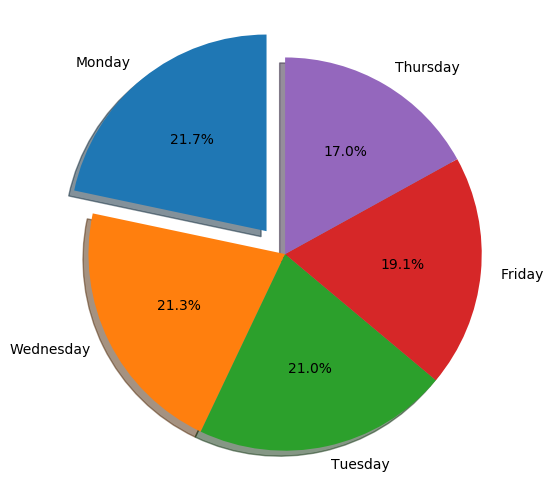

In [82]:
#Pie chart of Week Day
fig=plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')
df = pd.DataFrame(AbsentData['WeekDay'])
df['WeekDay'] = df.replace([2],"Monday")
df['WeekDay'] = df.replace([3],"Tuesday")
df['WeekDay'] = df.replace([4],"Wednesday")
df['WeekDay'] = df.replace([5],"Thursday")
df['WeekDay'] = df.replace([6],"Friday")
df = pd.value_counts(df.WeekDay).to_frame().reset_index()
df.columns = ['Day','Count']
plt.pie(
    df['Count'],
    labels=df['Day'],
    shadow=True,
    explode=(0.15,0,0,0,0),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.tight_layout()
plt.show()

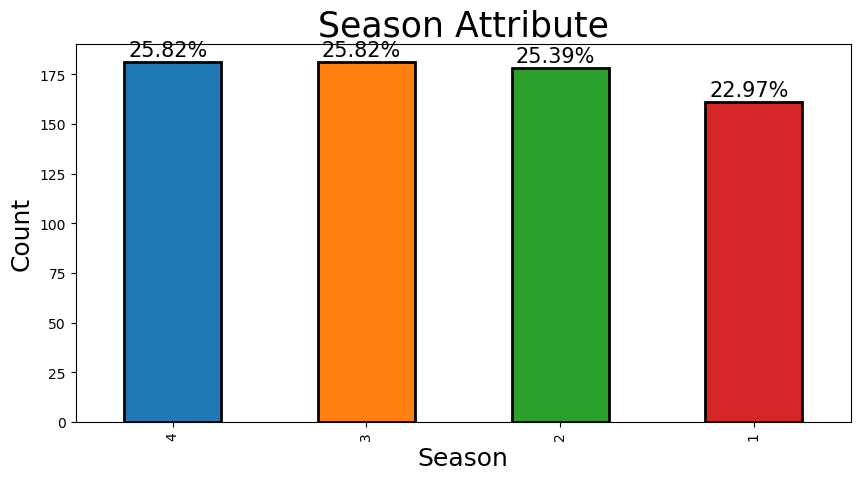

In [83]:
#Season Attribute
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
ax = AbsentData['Season'].value_counts().plot(kind='bar',align='center',edgecolor='black',linewidth=2)
ax.set_alpha(1)
ax.set_title("Season Attribute", fontsize=25)
ax.set_xlabel("Season", fontsize=18);
ax.set_ylabel("Count", fontsize=18);
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.02, i.get_height()+3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

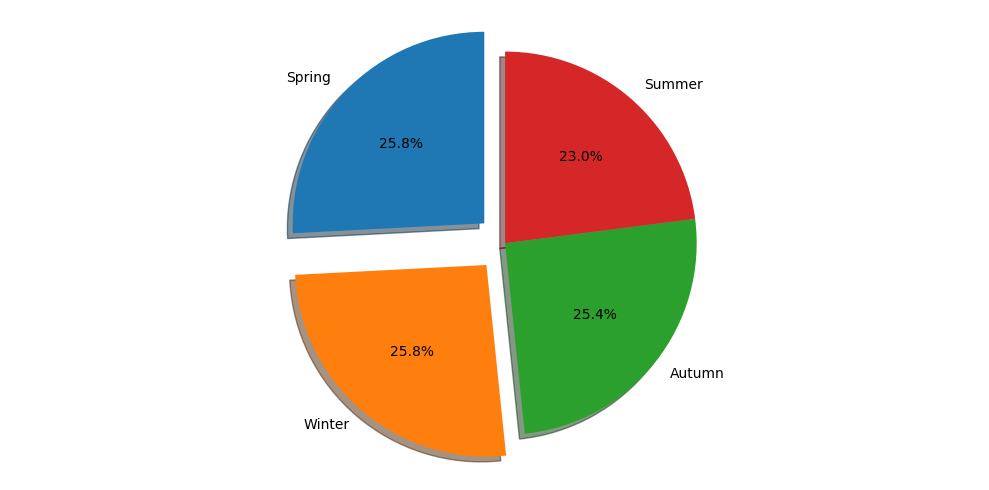

In [84]:
#Pie chart of year attribute
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')

df = pd.DataFrame(AbsentData['Season'])
df['Season'] = df.replace([1],"Summer")
df['Season'] = df.replace([2],"Autumn")
df['Season'] = df.replace([3],"Winter")
df['Season'] = df.replace([4],"Spring")
df = pd.value_counts(df.Season).to_frame().reset_index()
df.columns = ['Season','Count']
plt.pie(
    df['Count'],
    labels=df['Season'],
    shadow=True,
    explode=(0.15,0.15,0,0),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.tight_layout()
plt.show()

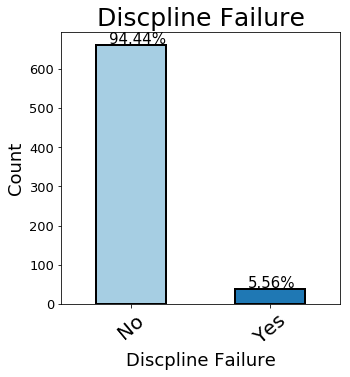

In [85]:
#univariate analsis of categorical attribute Year
ax = AbsentData['DiscplineFailure'].value_counts().plot(kind='bar',figsize=(5,5),fontsize=13,color=sns.color_palette("Paired", 7),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(1)
ax.set_title("Discpline Failure", fontsize=25)
ax.set_xlabel("Discpline Failure", fontsize=18);
ax.set_ylabel("Count", fontsize=18);
ax.set_xticklabels(labels =["No","Yes"], rotation=40, fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0.09, i.get_height()+3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

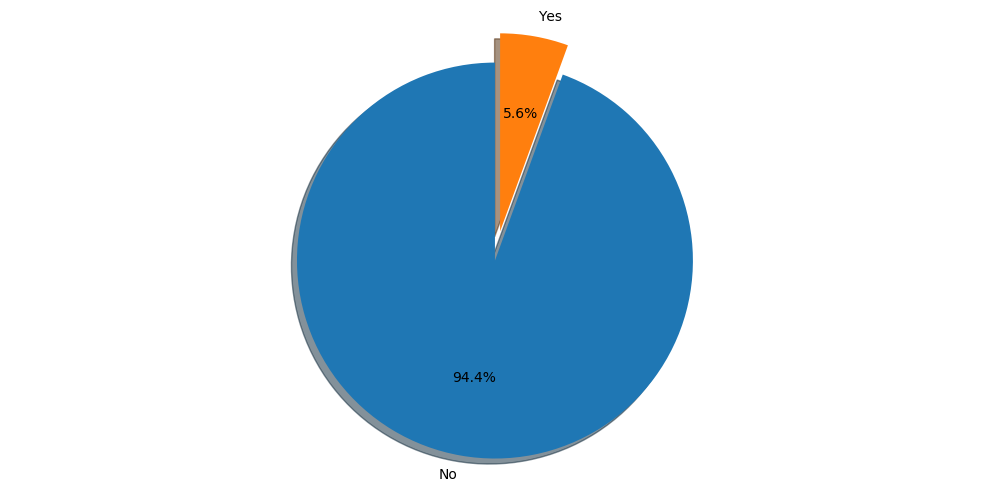

In [86]:
#pie chart of Working Schedule
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')

df = pd.DataFrame(AbsentData['DiscplineFailure'])
df['DiscplineFailure'] = df.replace([0],"No")
df['DiscplineFailure'] = df.replace([1],"Yes")
df = pd.value_counts(df.DiscplineFailure).to_frame().reset_index()
df.columns = ['DiscplineFailure','Count']
plt.pie(
    df['Count'],
    labels=df['DiscplineFailure'],
    shadow=True,
    explode=(0.15,0),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.tight_layout()
plt.show()

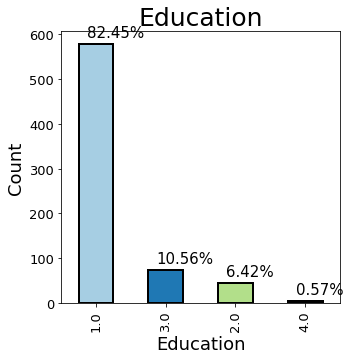

In [87]:
#univariate analsis of categorical attribute Holiday
ax = AbsentData['Education'].value_counts().plot(kind='bar',figsize=(5,5),fontsize=13,color=sns.color_palette("Paired", 7),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(1)
ax.set_title("Education", fontsize=25)
ax.set_xlabel("Education", fontsize=18);
ax.set_ylabel("Count", fontsize=18);
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0.12, i.get_height()+15, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

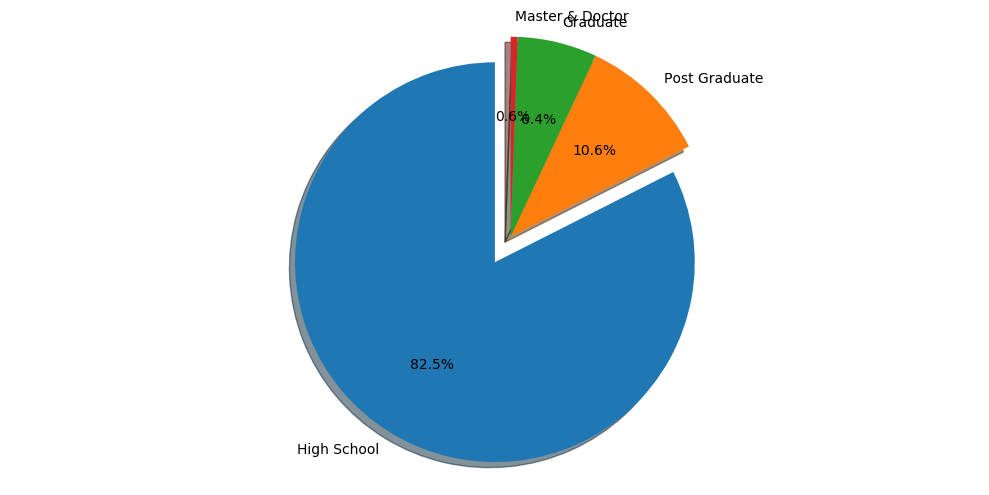

In [88]:
#Pie chart of Holiday variable
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
df = pd.DataFrame(AbsentData['Education'])
df['Education'] = df.replace([1],"High School")
df['Education'] = df.replace([2],"Graduate")
df['Education'] = df.replace([3],"Post Graduate")
df['Education'] = df.replace([4],"Master & Doctor")
df = pd.value_counts(df.Education).to_frame().reset_index()
df.columns = ['Education','Count']
plt.pie(
    df['Count'],
    labels=df['Education'],
    shadow=True,
    explode=(0.15,0,0,0),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.tight_layout()
plt.show()

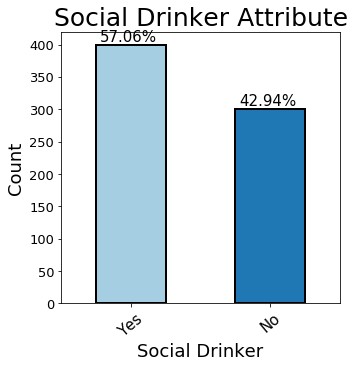

In [89]:
#univariate analsis of categorical attribute Day Weather
ax = AbsentData['SocialDrinker'].value_counts().plot(kind='bar',figsize=(5,5),fontsize=13,color=sns.color_palette("Paired", 7),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(1)
ax.set_title("Social Drinker Attribute", fontsize=25)
ax.set_xlabel("Social Drinker", fontsize=18);
ax.set_ylabel("Count", fontsize=18);
ax.set_xticklabels(labels =["Yes","No"], rotation=40, fontsize=15)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0.03, i.get_height()+5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

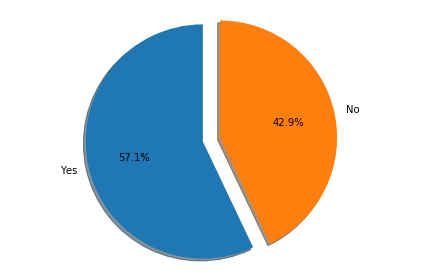

In [90]:
#Pie chart of Day weather variable
df = pd.DataFrame(AbsentData['SocialDrinker'])
df['SocialDrinker'] = df.replace([1],"Yes")
df['SocialDrinker'] = df.replace([0],"No")
df = pd.value_counts(df.SocialDrinker).to_frame().reset_index()
df.columns = ['SocialDrinker','Count']
plt.pie(
    df['Count'],
    labels=df['SocialDrinker'],
    shadow=True,
    explode=(0.15,0),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.tight_layout()
plt.show()

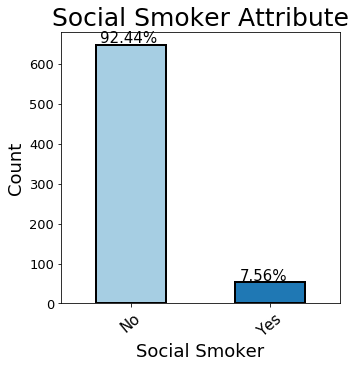

In [91]:
#univariate analsis of categorical attribute Social Smoker
ax = AbsentData['SocialSmoker'].value_counts().plot(kind='bar',figsize=(5,5),fontsize=13,color=sns.color_palette("Paired", 7),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(1)
ax.set_title("Social Smoker Attribute", fontsize=25)
ax.set_xlabel("Social Smoker", fontsize=18);
ax.set_xticklabels(labels =["No","Yes"], rotation=40, fontsize=15)
ax.set_ylabel("Count", fontsize=18);
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0.03, i.get_height()+5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

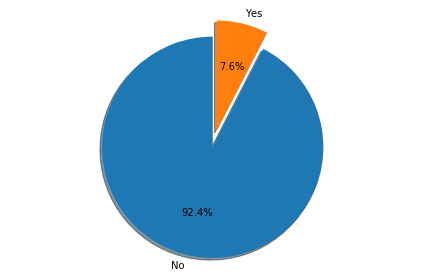

In [92]:
#Pie chart of Day weather variable
df = pd.DataFrame(AbsentData['SocialSmoker'])
df['SocialSmoker'] = df.replace(1.0,"Yes")
df['SocialSmoker'] = df.replace(0.0,"No")
df = pd.value_counts(df.SocialSmoker).to_frame().reset_index()
df.columns = ['SocialSmoker','Count']
plt.pie(
    df['Count'],
    labels=df['SocialSmoker'],
    shadow=True,
    explode=(0.15,0),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.tight_layout()
plt.show()

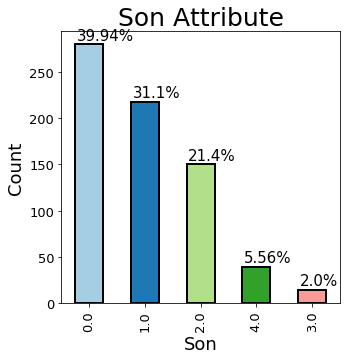

In [93]:
#univariate analsis of categorical attribute Son
ax = AbsentData['Son'].value_counts().plot(kind='bar',figsize=(5,5),fontsize=13,color=sns.color_palette("Paired", 7),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(1)
ax.set_title("Son Attribute", fontsize=25)
ax.set_xlabel("Son", fontsize=18);
ax.set_ylabel("Count", fontsize=18);
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0.03, i.get_height()+5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

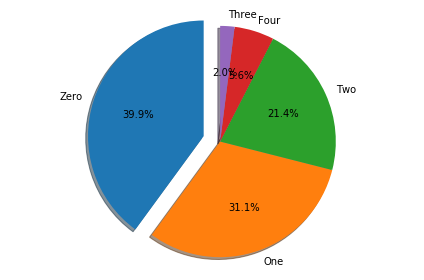

In [94]:
#Pie chart of Son variable
df = pd.DataFrame(AbsentData['Son'])
df = pd.value_counts(df.Son).to_frame().reset_index()
df.columns = ['Son','Count']
df['Son'] = df.replace(0.0,"Zero")
df['Son'] = df.replace(1.0,"One")
df['Son'] = df.replace(2.0,"Two")
df['Son'] = df.replace(3.0,"Three")
df['Son'] = df.replace(4.0,"Four")
plt.pie(
    df['Count'],
    labels=df['Son'],
    shadow=True,
    startangle=90,
    explode=(0.15,0,0,0,0),
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.tight_layout()
plt.show()

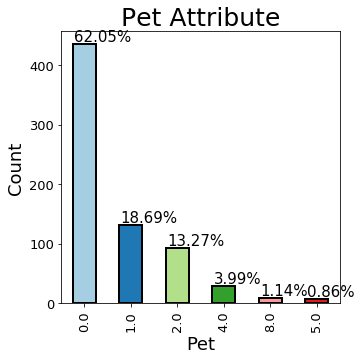

In [95]:
#univariate analsis of categorical attribute Pet
ax = AbsentData['Pet'].value_counts().plot(kind='bar',figsize=(5,5),fontsize=13,color=sns.color_palette("Paired", 7),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(1)
ax.set_title("Pet Attribute", fontsize=25)
ax.set_xlabel("Pet", fontsize=18);
ax.set_ylabel("Count", fontsize=18);
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0.03, i.get_height()+5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

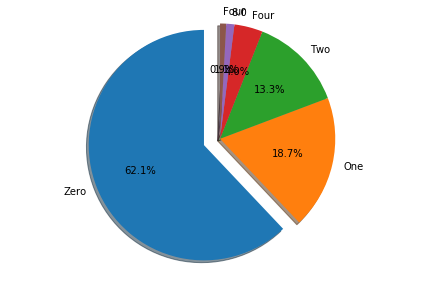

In [96]:
#Pie chart of Pet variable
df = pd.DataFrame(AbsentData['Pet'])
df = pd.value_counts(df.Pet).to_frame().reset_index()
df.columns = ['Pet','Count']
df['Pet'] = df.replace(0.0,"Zero")
df['Pet'] = df.replace(1.0,"One")
df['Pet'] = df.replace(2.0,"Two")
df['Pet'] = df.replace(3.0,"Three")
df['Pet'] = df.replace(4.0,"Four")
df['Pet'] = df.replace(5.0,"Four")
plt.pie(
    df['Count'],
    labels=df['Pet'],
    shadow=True,
    startangle=90,
    explode=(0.15,0,0,0,0,0),
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.tight_layout()
plt.show()

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Residence Distance V/S Service Time')

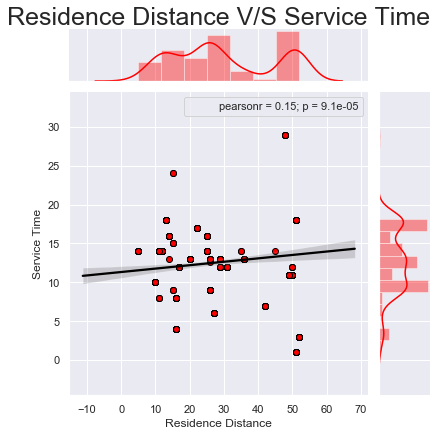

In [193]:
#Relation between Numerical Variable 'ResidentDistance' and Service Time
AbsentData['ResidentDistance'].value_counts()
AbsentData['ServiceTime'].value_counts()
ax = sns.jointplot("ResidentDistance","ServiceTime",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Residence Distance")
plt.ylabel("Service Time")
plt.title("Residence Distance V/S Service Time",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Residence Distance V/S Age')

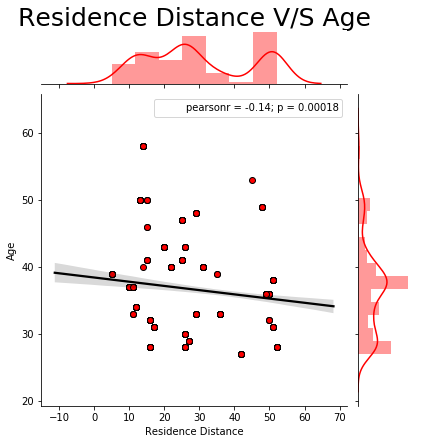

In [97]:
#Relation between Numerical Variable 'ResidentDistance' and 'Age'
AbsentData['ResidentDistance'].value_counts()
AbsentData['Age'].value_counts()
ax = sns.jointplot("ResidentDistance","Age",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Residence Distance")
plt.ylabel("Age")
plt.title("Residence Distance V/S Age",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Residence Distance V/S Average Work Load')

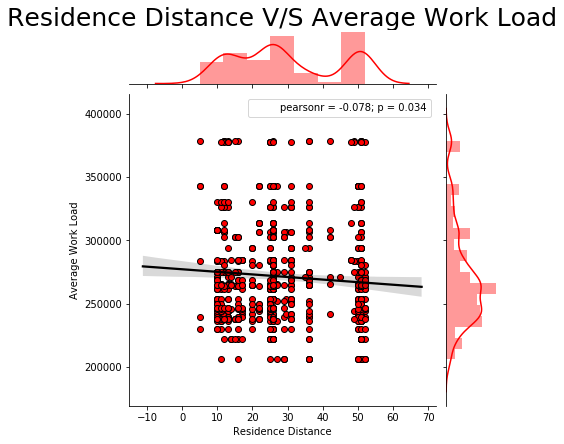

In [115]:
#Relation between Numerical Variable 'ResidentDistance' and Average Work Load
AbsentData['ResidentDistance'].value_counts()
AbsentData['AverageWorkLoad'].value_counts()
ax = sns.jointplot("ResidentDistance","AverageWorkLoad",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Residence Distance")
plt.ylabel("Average Work Load")
plt.title("Residence Distance V/S Average Work Load",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Residence Distance V/S Expenses')

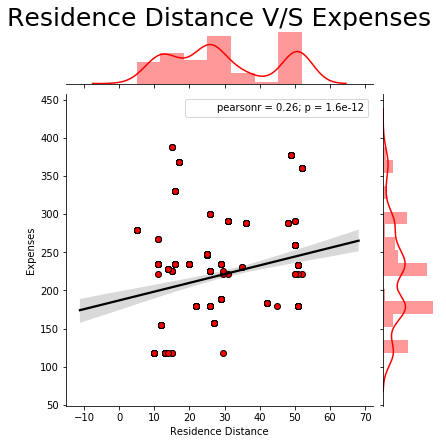

In [117]:
#Relation between Numerical Variable 'ResidentDistance' and 'Expense'
AbsentData['ResidentDistance'].value_counts()
AbsentData['Expenses'].value_counts()
ax = sns.jointplot("ResidentDistance","Expenses",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Residence Distance")
plt.ylabel("Expenses")
plt.title("Residence Distance V/S Expenses",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Residence Distance V/S Hit Target')

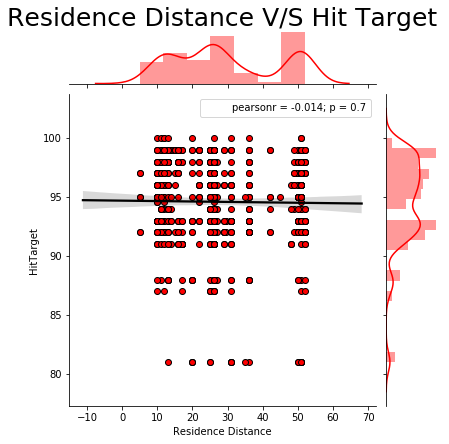

In [118]:
#Relation between Numerical Variable 'ResidentDistance' and 'HitTarget'
AbsentData['ResidentDistance'].value_counts()
AbsentData['HitTarget'].value_counts()
ax = sns.jointplot("ResidentDistance","HitTarget",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Residence Distance")
plt.ylabel("HitTarget")
plt.title("Residence Distance V/S Hit Target",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Residence Distance v/s Weight')

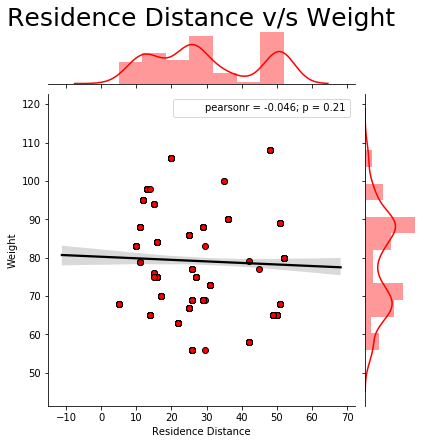

In [120]:
#Relation between Numerical Variable 'ResidentDistance' and 'Weight'
AbsentData['ResidentDistance'].value_counts()
AbsentData['Weight'].value_counts()
ax = sns.jointplot("ResidentDistance","Weight",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Residence Distance")
plt.ylabel("Weight")
plt.title("Residence Distance v/s Weight",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Residence Distance V/S Height')

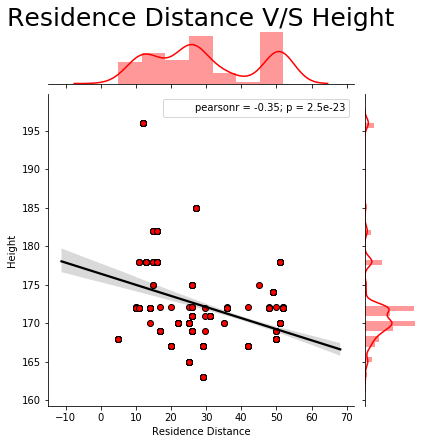

In [121]:
#Relation between Numerical Variable 'ResidentDistance' and 'Height'
AbsentData['ResidentDistance'].value_counts()
AbsentData['Height'].value_counts()
ax = sns.jointplot("ResidentDistance","Height",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Residence Distance")
plt.ylabel("Height")
plt.title("Residence Distance V/S Height",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Residence Distance v/s Body Mass Index')

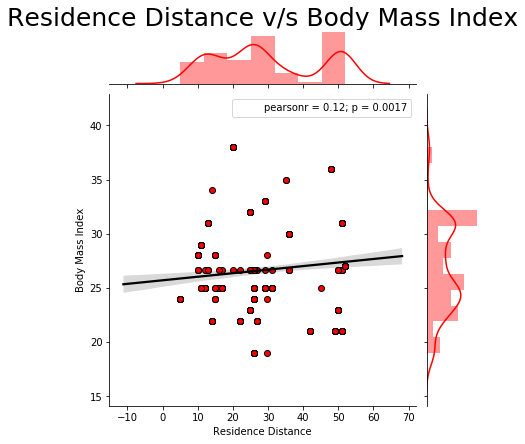

In [122]:
#Relation between Numerical Variable 'ResidentDistance' and 'Body Mass Index'
AbsentData['ResidentDistance'].value_counts()
AbsentData['BodyMassIndex'].value_counts()
ax = sns.jointplot("ResidentDistance","BodyMassIndex",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Residence Distance")
plt.ylabel("Body Mass Index")
plt.title("Residence Distance v/s Body Mass Index",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Residence Distance v/s Absent Time')

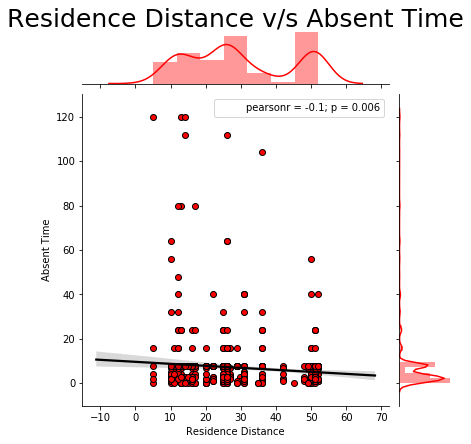

In [123]:
#Relation between Numerical Variable 'ResidentDistance' and 'Absent Time
AbsentData['ResidentDistance'].value_counts()
AbsentData['AbsentTime'].value_counts()
ax = sns.jointplot("ResidentDistance","AbsentTime",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Residence Distance")
plt.ylabel("Absent Time")
plt.title("Residence Distance v/s Absent Time",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Service Time v/s Age')

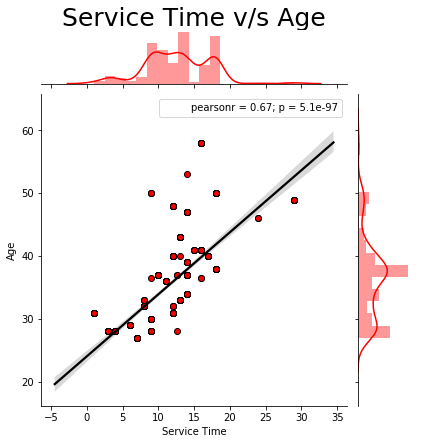

In [124]:
#Relation between Numerical Variable 'Service Time' and 'Age'
AbsentData['ServiceTime'].value_counts()
AbsentData['Age'].value_counts()
ax = sns.jointplot("ServiceTime","Age",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Service Time")
plt.ylabel("Age")
plt.title("Service Time v/s Age",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Service Time v/s Average Work Load')

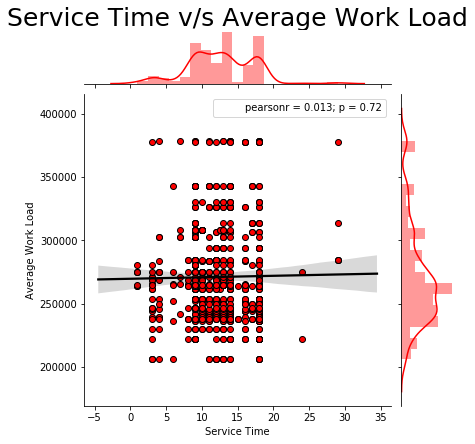

In [125]:
#Relation between Numerical Variable 'Service Time' and 'Average Work Load'
AbsentData['ServiceTime'].value_counts()
AbsentData['AverageWorkLoad'].value_counts()
ax = sns.jointplot("ServiceTime","AverageWorkLoad",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Service Time")
plt.ylabel("Average Work Load")
plt.title("Service Time v/s Average Work Load",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Service Time v/s Expenses')

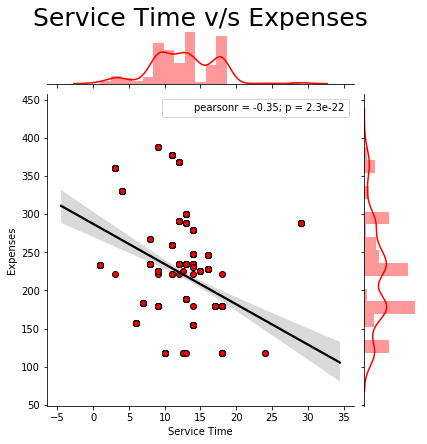

In [126]:
#Relation between Numerical Variable 'Service Time' and 'Expenses'
AbsentData['ServiceTime'].value_counts()
AbsentData['Expenses'].value_counts()
ax = sns.jointplot("ServiceTime","Expenses",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Service Time")
plt.ylabel("Expenses")
plt.title("Service Time v/s Expenses",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Service Time v/s Hit Target')

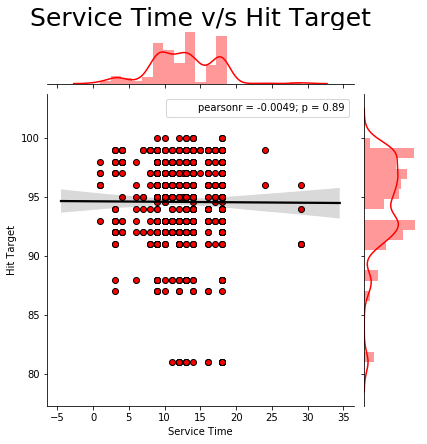

In [127]:
#Relation between Numerical Variable 'Service Time' and 'Hit Target'
AbsentData['ServiceTime'].value_counts()
AbsentData['HitTarget'].value_counts()
ax = sns.jointplot("ServiceTime","HitTarget",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Service Time")
plt.ylabel("Hit Target")
plt.title("Service Time v/s Hit Target",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Service Time v/s Weight')

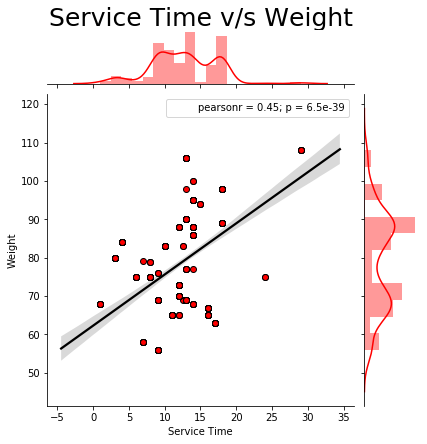

In [128]:
#Relation between Numerical Variable 'Service Time' and 'Weight'
AbsentData['ServiceTime'].value_counts()
AbsentData['Weight'].value_counts()
ax = sns.jointplot("ServiceTime","Weight",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Service Time")
plt.ylabel("Weight")
plt.title("Service Time v/s Weight",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Service Time v/s Height')

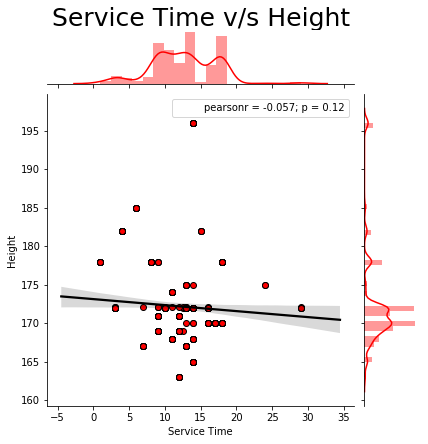

In [129]:
#Relation between Numerical Variable 'Service Time' and 'Height'
AbsentData['ServiceTime'].value_counts()
AbsentData['Height'].value_counts()
ax = sns.jointplot("ServiceTime","Height",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Service Time")
plt.ylabel("Height")
plt.title("Service Time v/s Height",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Service Time v/s Body Mass Index')

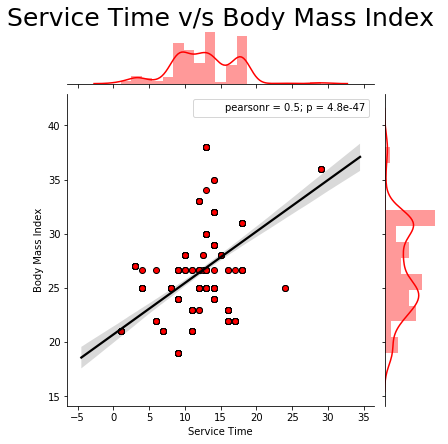

In [130]:
#Relation between Numerical Variable 'Service Time' and 'BodyMassIndex'
AbsentData['ServiceTime'].value_counts()
AbsentData['BodyMassIndex'].value_counts()
ax = sns.jointplot("ServiceTime","BodyMassIndex",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Service Time")
plt.ylabel("Body Mass Index")
plt.title("Service Time v/s Body Mass Index",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Service Time v/s Absent Time')

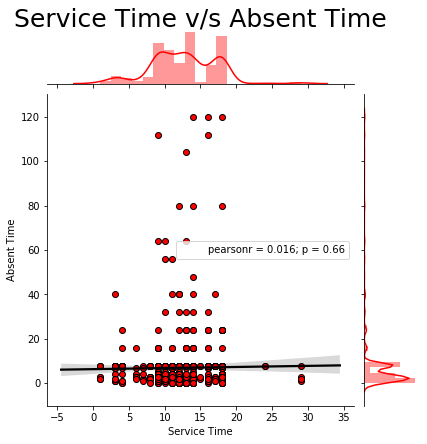

In [133]:
#Relation between Numerical Variable 'Service Time' and 'Absent Time'
AbsentData['ServiceTime'].value_counts()
AbsentData['AbsentTime'].value_counts()
ax = sns.jointplot("ServiceTime","AbsentTime",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Service Time")
plt.ylabel("Absent Time")
plt.title("Service Time v/s Absent Time",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Age v/s Average Work Load')

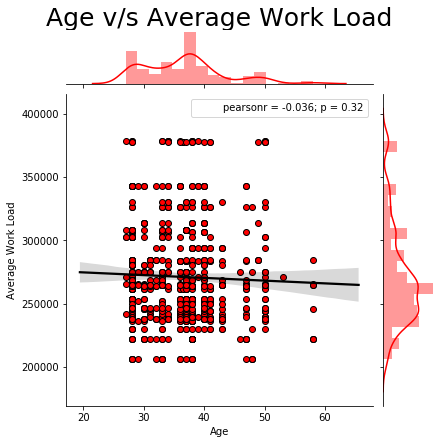

In [134]:
#Relation between Numerical Variable 'Age and 'Average Work Load'
AbsentData['Age'].value_counts()
AbsentData['AverageWorkLoad'].value_counts()
ax = sns.jointplot("Age","AverageWorkLoad",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Age")
plt.ylabel("Average Work Load")
plt.title("Age v/s Average Work Load",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Age v/s Average Work Load')

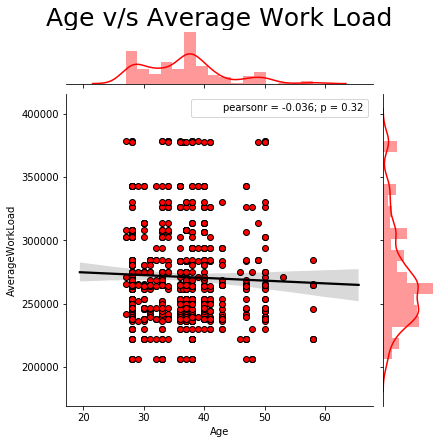

In [136]:
#Relation between Numerical Variable 'Age and 'Average Work Laod'
AbsentData['Age'].value_counts()
AbsentData['AverageWorkLoad'].value_counts()
ax = sns.jointplot("Age","AverageWorkLoad",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Age")
plt.ylabel("AverageWorkLoad")
plt.title("Age v/s Average Work Load",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Age v/s Expenses')

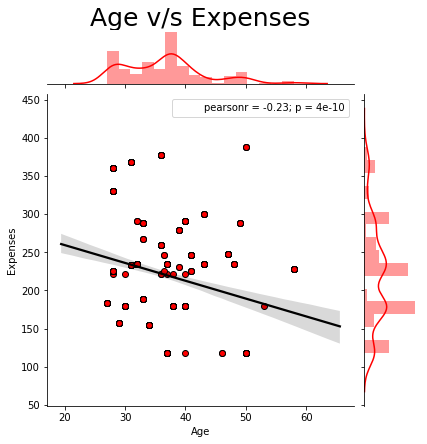

In [137]:
#Relation between Numerical Variable 'Age and 'Expenses'
AbsentData['Age'].value_counts()
AbsentData['Expenses'].value_counts()
ax = sns.jointplot("Age","Expenses",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Age")
plt.ylabel("Expenses")
plt.title("Age v/s Expenses",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Age v/s Hit Target')

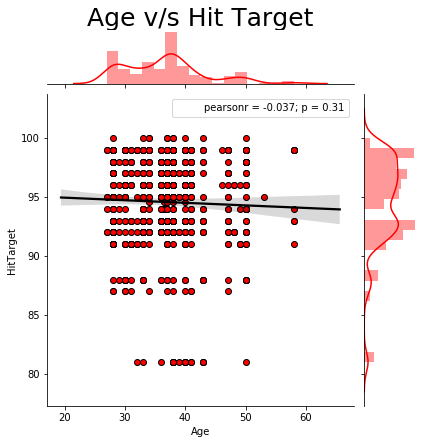

In [138]:
#Relation between Numerical Variable 'Age and 'HitTarget'
AbsentData['Age'].value_counts()
AbsentData['HitTarget'].value_counts()
ax = sns.jointplot("Age","HitTarget",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Age")
plt.ylabel("HitTarget")
plt.title("Age v/s Hit Target",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Age v/s Weight')

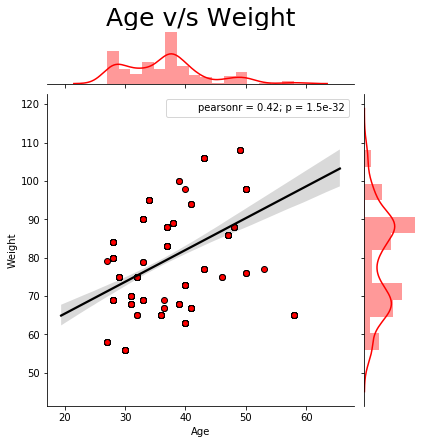

In [139]:
#Relation between Numerical Variable 'Age and 'Weight'
AbsentData['Age'].value_counts()
AbsentData['Weight'].value_counts()
ax = sns.jointplot("Age","Weight",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Age")
plt.ylabel("Weight")
plt.title("Age v/s Weight",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Age v/s Height')

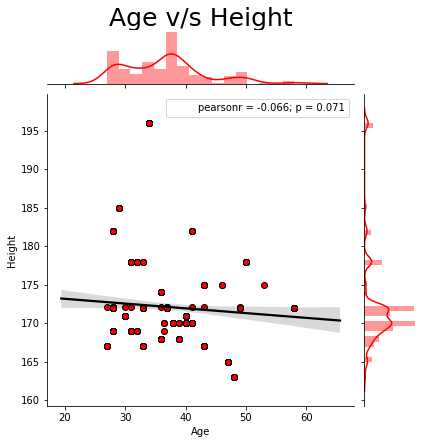

In [140]:
#Relation between Numerical Variable 'Age and 'Height'
AbsentData['Age'].value_counts()
AbsentData['Height'].value_counts()
ax = sns.jointplot("Age","Height",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Age")
plt.ylabel("Height")
plt.title("Age v/s Height",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Age v/s Body Mass Index')

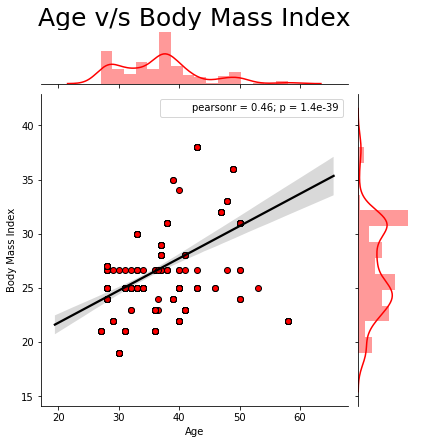

In [142]:
#Relation between Numerical Variable 'Age and 'Body Mass Index'
AbsentData['Age'].value_counts()
AbsentData['BodyMassIndex'].value_counts()
ax = sns.jointplot("Age","BodyMassIndex",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Age")
plt.ylabel("Body Mass Index")
plt.title("Age v/s Body Mass Index",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Age v/s Absent Time')

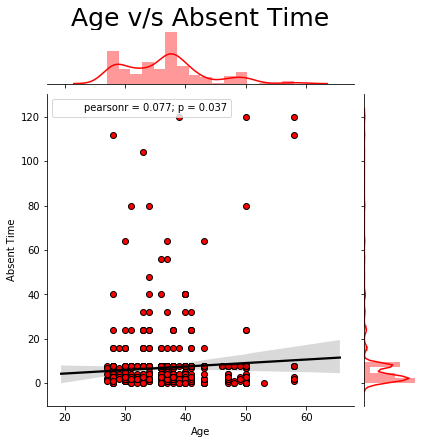

In [144]:
#Relation between Numerical Variable 'Age and 'Absent Time'
AbsentData['Age'].value_counts()
AbsentData['AbsentTime'].value_counts()
ax = sns.jointplot("Age","AbsentTime",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Age")
plt.ylabel("Absent Time")
plt.title("Age v/s Absent Time",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Average Work Load v/s Expenses')

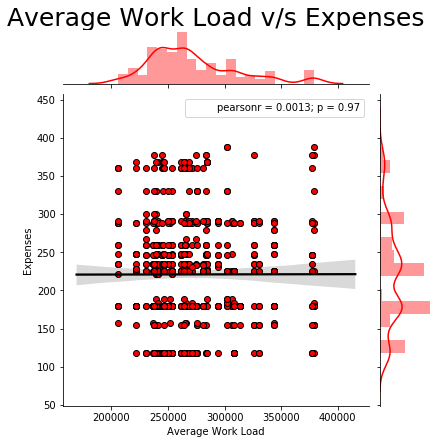

In [145]:
#Relation between Numerical Variable 'Average Work Laod and 'Expenses'
AbsentData['AverageWorkLoad'].value_counts()
AbsentData['Expenses'].value_counts()
ax = sns.jointplot("AverageWorkLoad","Expenses",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Average Work Load")
plt.ylabel("Expenses")
plt.title("Average Work Load v/s Expenses",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Average Work Load v/s Hit Target')

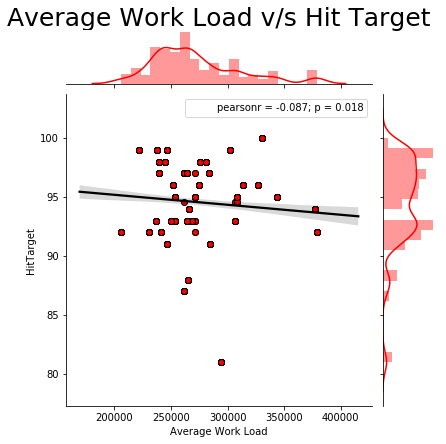

In [146]:
#Relation between Numerical Variable 'Average Work Laod and 'Hit Target'
AbsentData['AverageWorkLoad'].value_counts()
AbsentData['HitTarget'].value_counts()
ax = sns.jointplot("AverageWorkLoad","HitTarget",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Average Work Load")
plt.ylabel("HitTarget")
plt.title("Average Work Load v/s Hit Target",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Average Work Load v/s Weight')

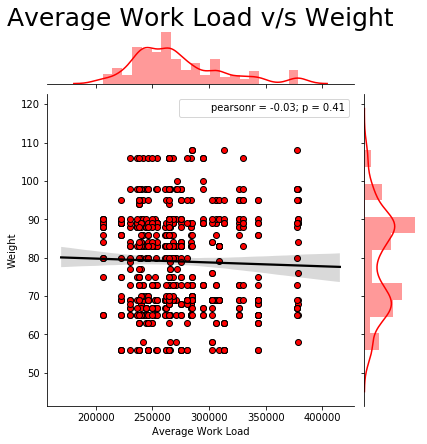

In [147]:
#Relation between Numerical Variable 'Average Work Laod and 'Weight'
AbsentData['AverageWorkLoad'].value_counts()
AbsentData['Weight'].value_counts()
ax = sns.jointplot("AverageWorkLoad","Weight",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Average Work Load")
plt.ylabel("Weight")
plt.title("Average Work Load v/s Weight",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Average Work Load v/s Height')

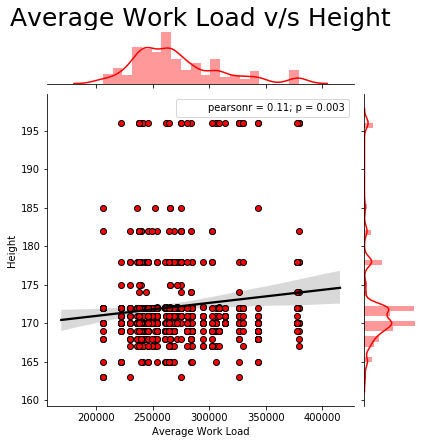

In [148]:
#Relation between Numerical Variable 'Average Work Laod and 'Height'
AbsentData['AverageWorkLoad'].value_counts()
AbsentData['Height'].value_counts()
ax = sns.jointplot("AverageWorkLoad","Height",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Average Work Load")
plt.ylabel("Height")
plt.title("Average Work Load v/s Height",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Average Work Load v/s Body Mass Index')

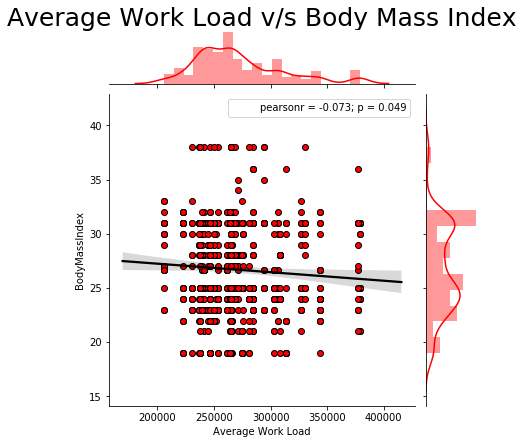

In [149]:
#Relation between Numerical Variable 'Average Work Laod and 'Body Mass Index'
AbsentData['AverageWorkLoad'].value_counts()
AbsentData['BodyMassIndex'].value_counts()
ax = sns.jointplot("AverageWorkLoad","BodyMassIndex",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Average Work Load")
plt.ylabel("BodyMassIndex")
plt.title("Average Work Load v/s Body Mass Index",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Average Work Load v/s Absent Time')

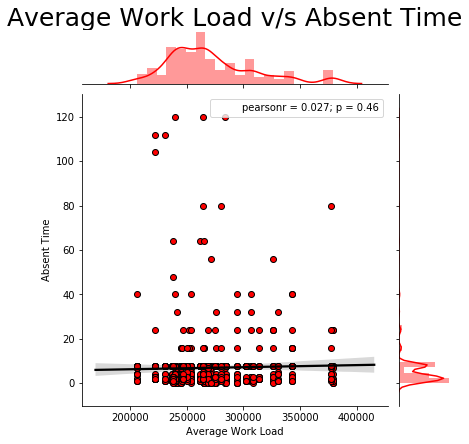

In [150]:
#Relation between Numerical Variable 'Average Work Laod and 'Absent Time'
AbsentData['AverageWorkLoad'].value_counts()
AbsentData['AbsentTime'].value_counts()
ax = sns.jointplot("AverageWorkLoad","AbsentTime",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Average Work Load")
plt.ylabel("Absent Time")
plt.title("Average Work Load v/s Absent Time",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Expenses v/s Hit Target')

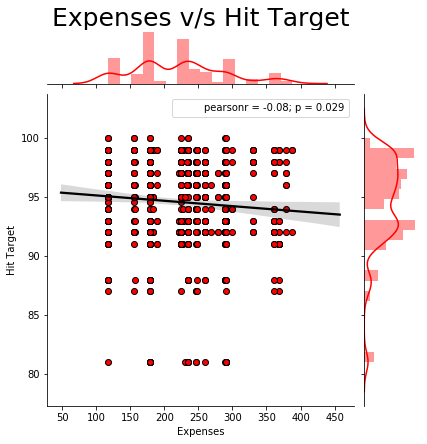

In [151]:
#Relation between Numerical Variable 'Expenses' and 'Hit Target'
AbsentData['Expenses'].value_counts()
AbsentData['HitTarget'].value_counts()
ax = sns.jointplot("Expenses","HitTarget",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Expenses")
plt.ylabel("Hit Target")
plt.title("Expenses v/s Hit Target",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Expenses v/s Weight')

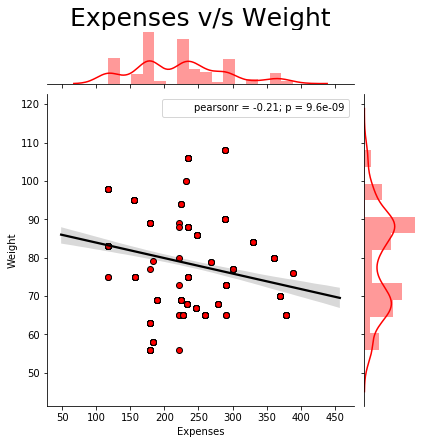

In [152]:
#Relation between Numerical Variable 'Expenses' and 'Weight'
AbsentData['Expenses'].value_counts()
AbsentData['Weight'].value_counts()
ax = sns.jointplot("Expenses","Weight",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Expenses")
plt.ylabel("Weight")
plt.title("Expenses v/s Weight",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Expenses v/s Height')

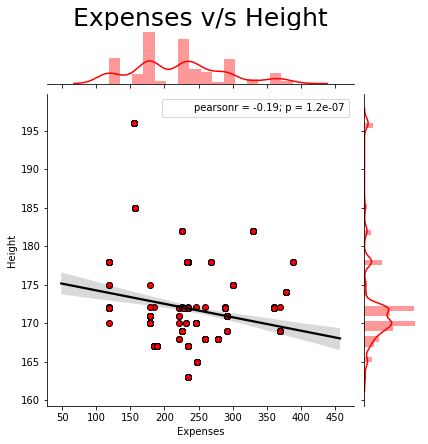

In [153]:
#Relation between Numerical Variable 'Expenses' and 'Height'
AbsentData['Expenses'].value_counts()
AbsentData['Height'].value_counts()
ax = sns.jointplot("Expenses","Height",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Expenses")
plt.ylabel("Height")
plt.title("Expenses v/s Height",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Expenses v/s Body Mass Index')

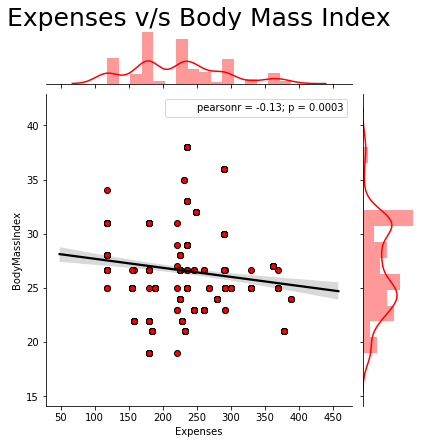

In [154]:
#Relation between Numerical Variable 'Expenses' and 'Body Mass Index'
AbsentData['Expenses'].value_counts()
AbsentData['BodyMassIndex'].value_counts()
ax = sns.jointplot("Expenses","BodyMassIndex",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Expenses")
plt.ylabel("BodyMassIndex")
plt.title("Expenses v/s Body Mass Index",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Expenses v/s Absent Time')

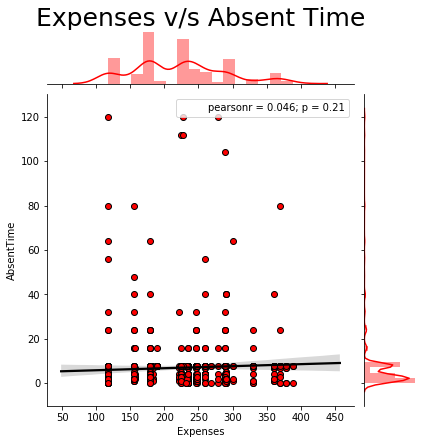

In [155]:
#Relation between Numerical Variable 'Expenses' and 'Absent Time'
AbsentData['Expenses'].value_counts()
AbsentData['AbsentTime'].value_counts()
ax = sns.jointplot("Expenses","AbsentTime",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Expenses")
plt.ylabel("AbsentTime")
plt.title("Expenses v/s Absent Time",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Hit Target v/s Weight')

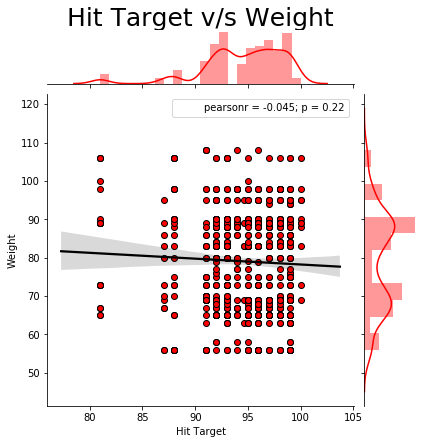

In [156]:
#Relation between Numerical Variable 'Hit Target' and 'Weight'
AbsentData['HitTarget'].value_counts()
AbsentData['Weight'].value_counts()
ax = sns.jointplot("HitTarget","Weight",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Hit Target")
plt.ylabel("Weight")
plt.title("Hit Target v/s Weight",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Hit Target v/s Height')

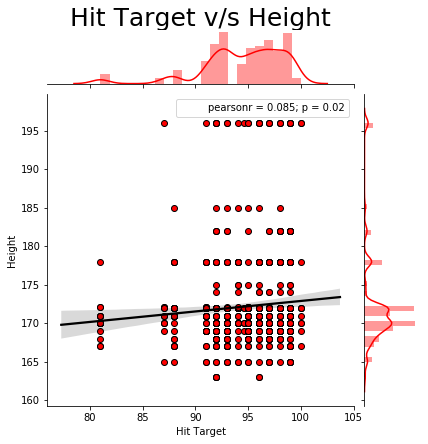

In [157]:
#Relation between Numerical Variable 'Hit Target' and 'Height'
AbsentData['HitTarget'].value_counts()
AbsentData['Height'].value_counts()
ax = sns.jointplot("HitTarget","Height",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Hit Target")
plt.ylabel("Height")
plt.title("Hit Target v/s Height",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Hit Target v/s Body Mass Index')

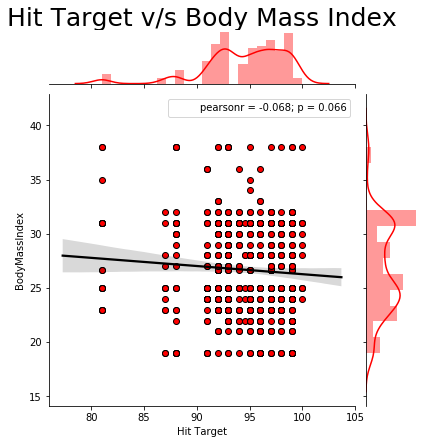

In [158]:
#Relation between Numerical Variable 'Hit Target' and 'Body Mass Index'
AbsentData['HitTarget'].value_counts()
AbsentData['BodyMassIndex'].value_counts()
ax = sns.jointplot("HitTarget","BodyMassIndex",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Hit Target")
plt.ylabel("BodyMassIndex")
plt.title("Hit Target v/s Body Mass Index",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Hit Target v/s Absent Time')

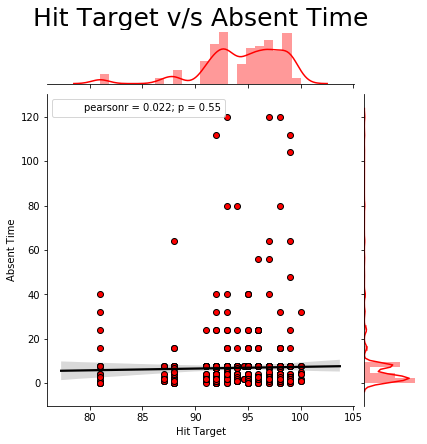

In [159]:
#Relation between Numerical Variable 'Hit Target' and 'Absent Time'
AbsentData['HitTarget'].value_counts()
AbsentData['AbsentTime'].value_counts()
ax = sns.jointplot("HitTarget","AbsentTime",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Hit Target")
plt.ylabel("Absent Time")
plt.title("Hit Target v/s Absent Time",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Weight v/s Height')

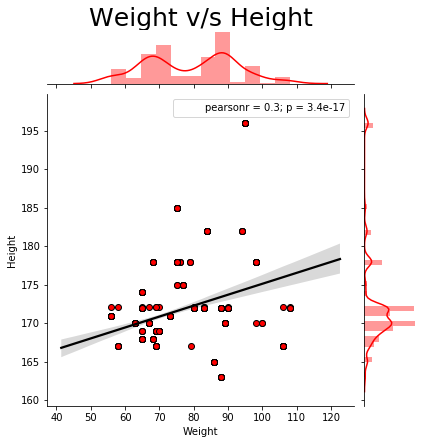

In [160]:
#Relation between Numerical Variable 'Weight' and 'Height'
AbsentData['Weight'].value_counts()
AbsentData['Height'].value_counts()
ax = sns.jointplot("Weight","Height",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight v/s Height",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Weight v/s Body Mass Index')

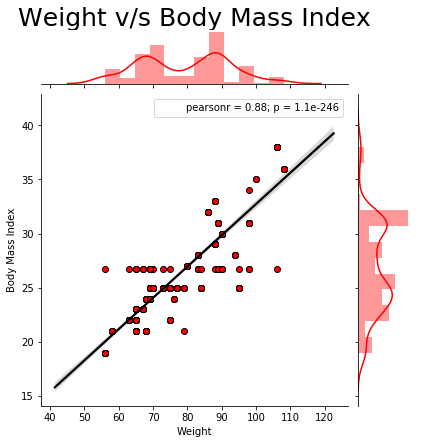

In [161]:
#Relation between Numerical Variable 'Weight' and 'Body Mass Index'
AbsentData['Weight'].value_counts()
AbsentData['BodyMassIndex'].value_counts()
ax = sns.jointplot("Weight","BodyMassIndex",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Weight")
plt.ylabel("Body Mass Index")
plt.title("Weight v/s Body Mass Index",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Weight v/s Absent Time')

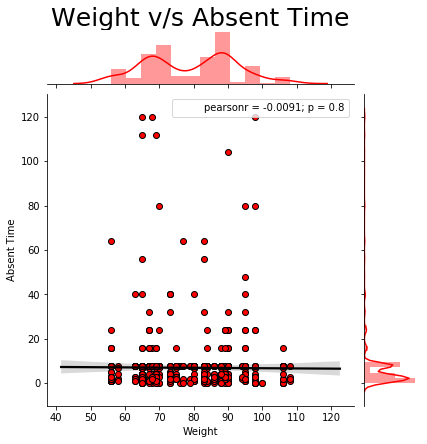

In [162]:
#Relation between Numerical Variable 'Weight' and 'Absent Time'
AbsentData['Weight'].value_counts()
AbsentData['AbsentTime'].value_counts()
ax = sns.jointplot("Weight","AbsentTime",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Weight")
plt.ylabel("Absent Time")
plt.title("Weight v/s Absent Time",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Height v/s Body Mass Index')

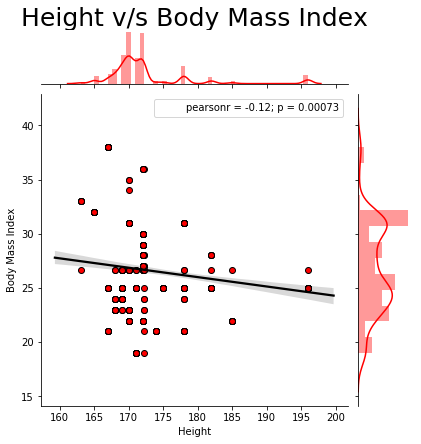

In [163]:
#Relation between Numerical Variable 'Height' and 'Body Mass Index'
AbsentData['Height'].value_counts()
AbsentData['BodyMassIndex'].value_counts()
ax = sns.jointplot("Height","BodyMassIndex",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Height")
plt.ylabel("Body Mass Index")
plt.title("Height v/s Body Mass Index",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Height v/s Absent Time')

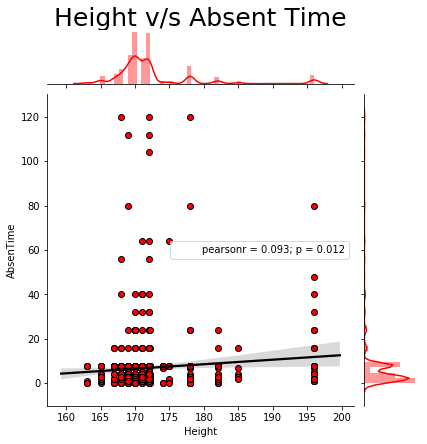

In [164]:
#Relation between Numerical Variable 'Height' and 'Absent Time'
AbsentData['Height'].value_counts()
AbsentData['AbsentTime'].value_counts()
ax = sns.jointplot("Height","AbsentTime",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Height")
plt.ylabel("AbsenTime")
plt.title("Height v/s Absent Time",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Body Mass Index v/s Absent Time')

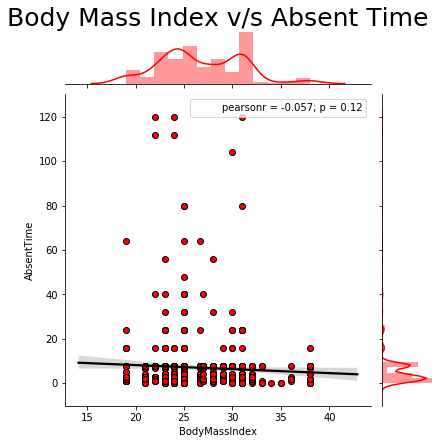

In [165]:
#Relation between Numerical Variable 'Body Mass Index' and 'Absent Time'
AbsentData['BodyMassIndex'].value_counts()
AbsentData['AbsentTime'].value_counts()
ax = sns.jointplot("BodyMassIndex","AbsentTime",data=AbsentData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("BodyMassIndex")
plt.ylabel("AbsentTime")
plt.title("Body Mass Index v/s Absent Time",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


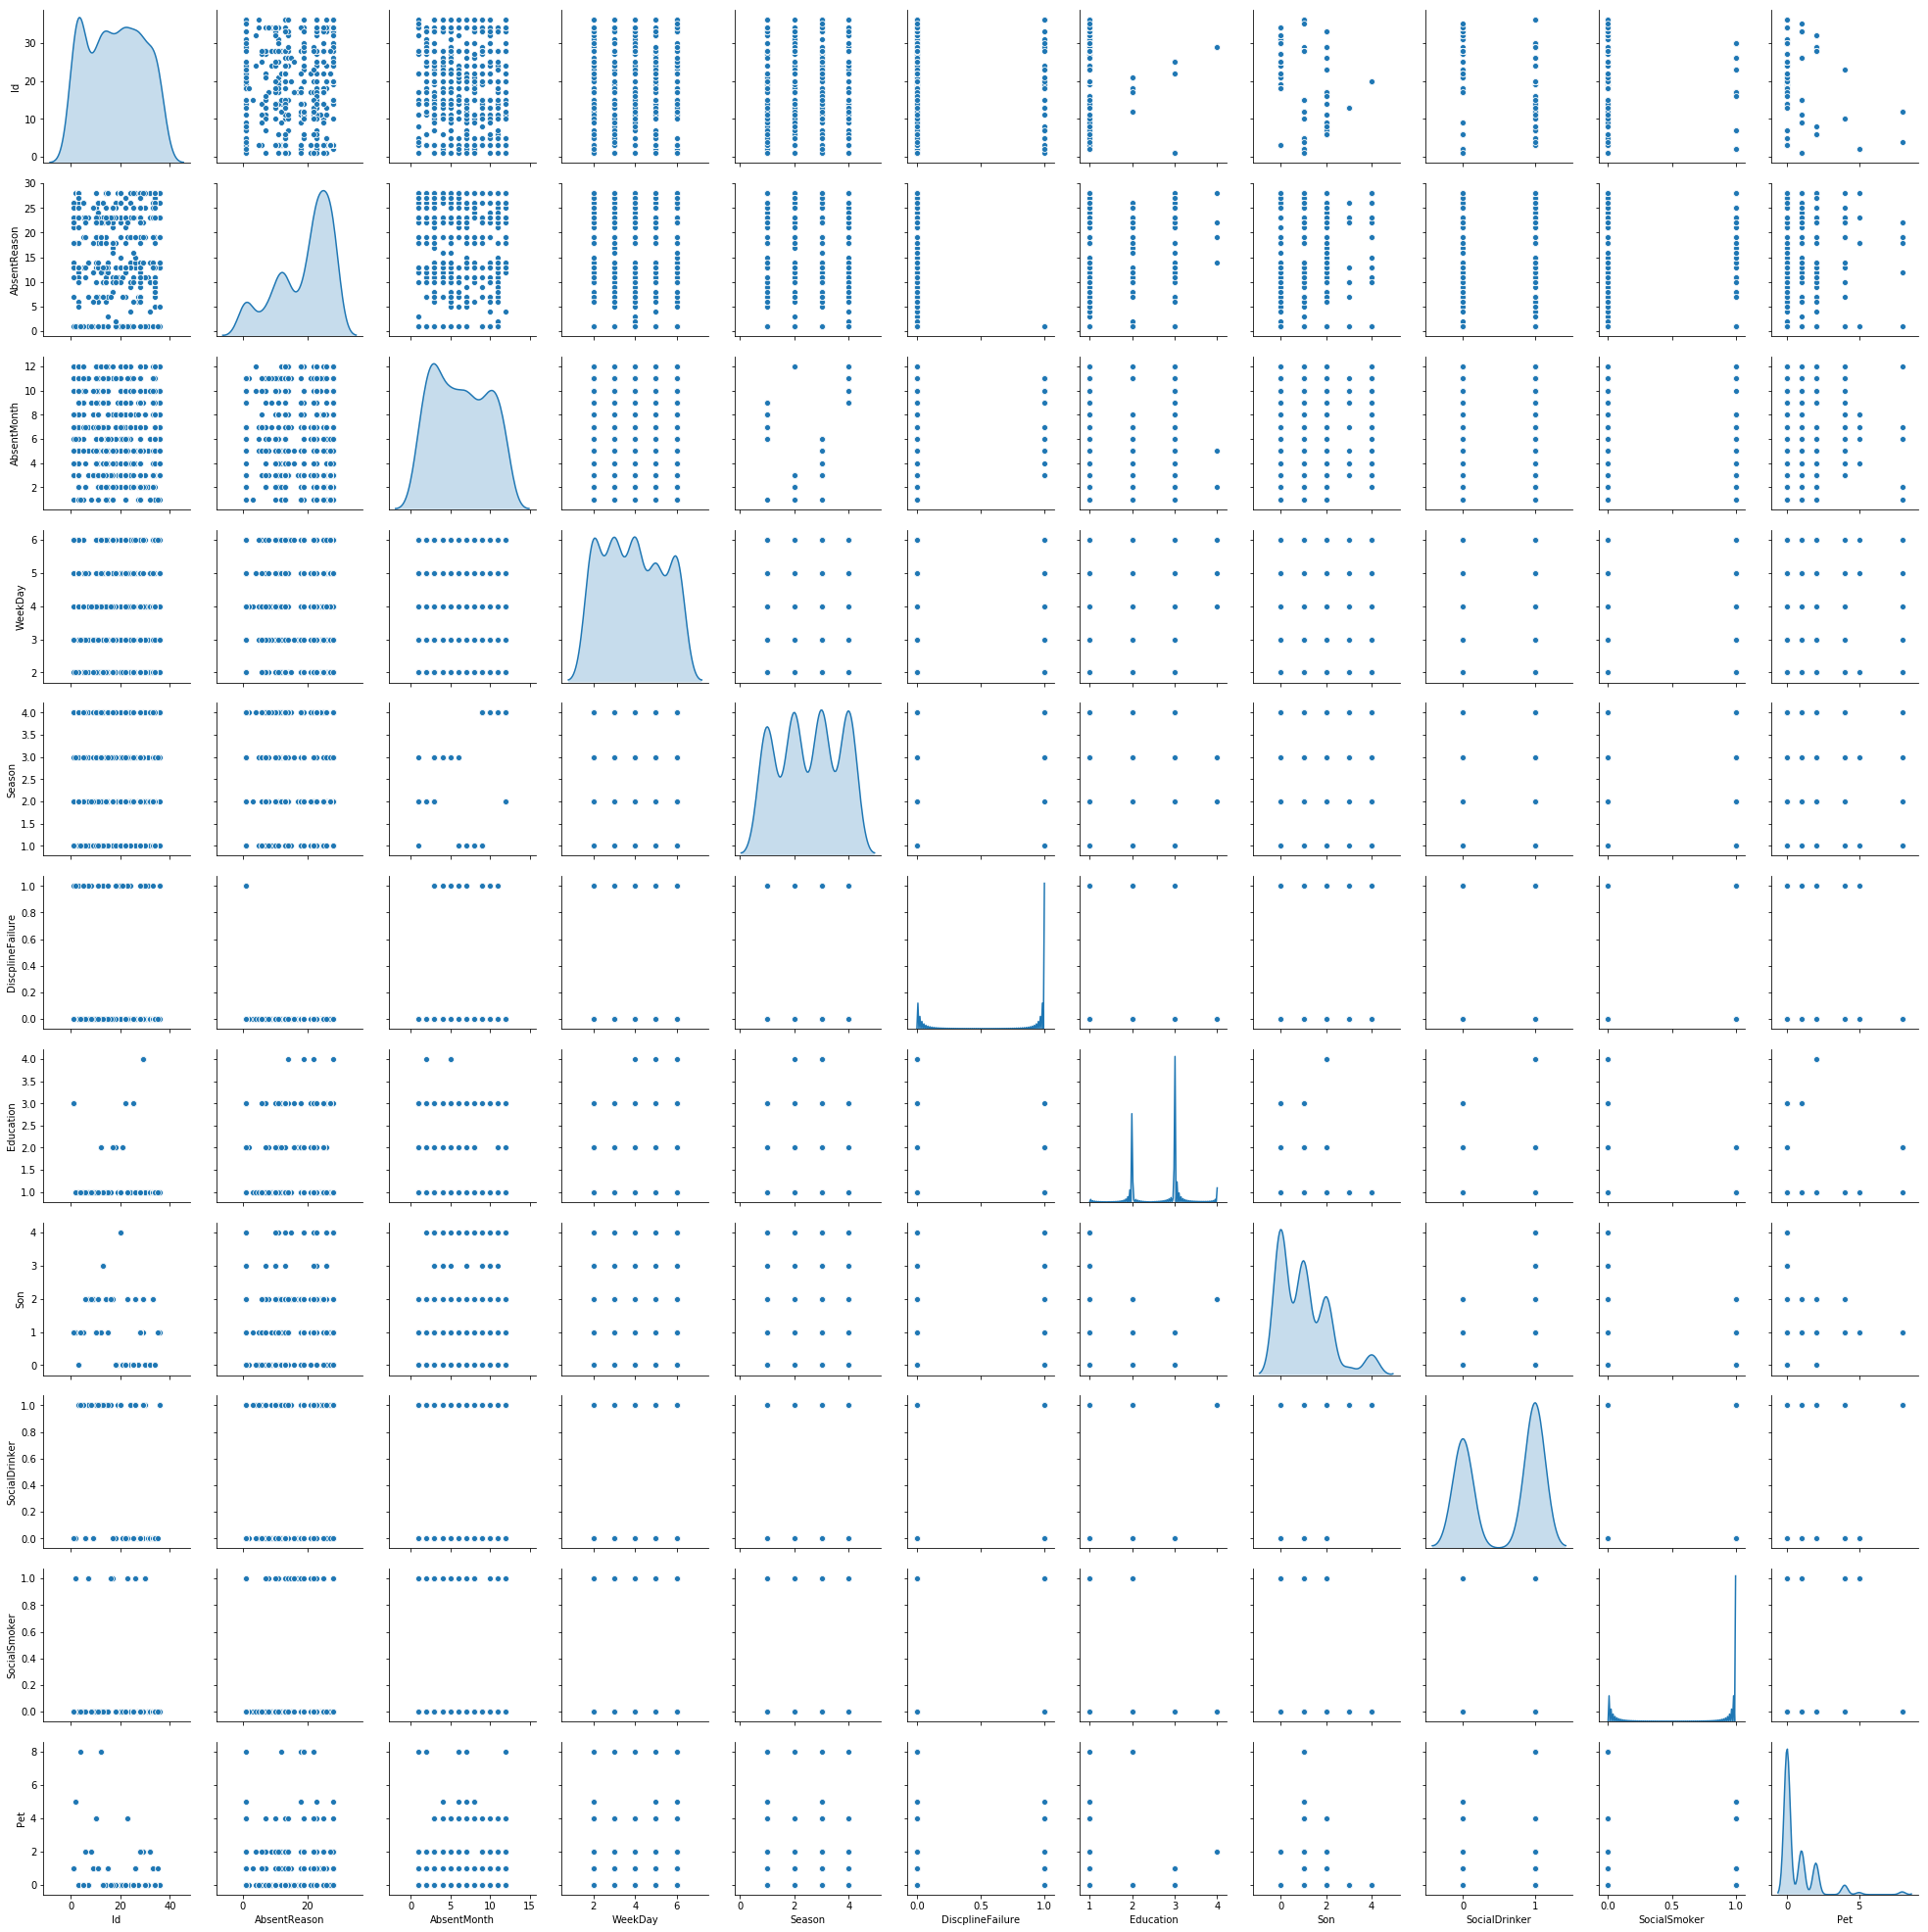

In [41]:
#Pairplot of all Numeric attribute
DataHist = AbsentData.drop(['ResidentDistance', 'ServiceTime','Age','AverageWorkLoad','Expenses','HitTarget','Weight','Height','BodyMassIndex','AbsentTime'], axis=1)
sns.pairplot(DataHist,diag_kind="kde")


Text(0.5,1,'Outliers Detection in Absent Time Attribute')

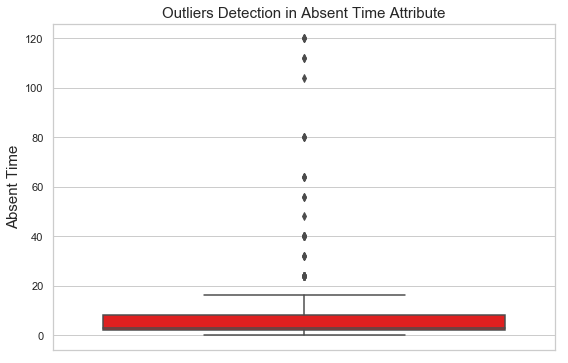

In [208]:
#Outliers Detection using Box PLot Method.
#Detecting outliers for Target Variable i.e. "Absent Time"
sns.set_style("whitegrid") 
fig = plt.figure(1, figsize=(9, 6))
ax = sns.boxplot(x="AbsentTime", data=AbsentData,orient="v",color='red')
plt.ylabel("Absent Time",fontsize=15)
plt.title("Outliers Detection in Absent Time Attribute",fontsize=15)

-7.0
17.0


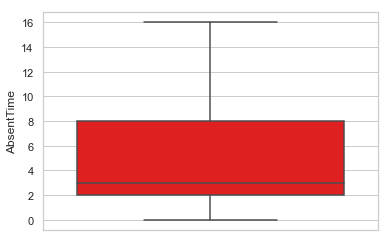

In [209]:
Name = ['AbsentTime']
for i in Name:
    q75, q25 = np.percentile(AbsentData.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)

AbsentDataCopy = AbsentData.copy()

AbsentDataCopy = AbsentDataCopy.drop(AbsentDataCopy[AbsentDataCopy.loc[:,i] < min].index)
AbsentDataCopy = AbsentDataCopy.drop(AbsentDataCopy[AbsentDataCopy.loc[:,'AbsentTime'] > max].index)

# Boxplot for casual after  aoutlier removal

sns.set(style="whitegrid")
 #tips = sns.load_dataset("tips")
ax = sns.boxplot(x="AbsentTime", data=AbsentDataCopy,orient="v",color='red')
AbsentData = AbsentDataCopy


C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


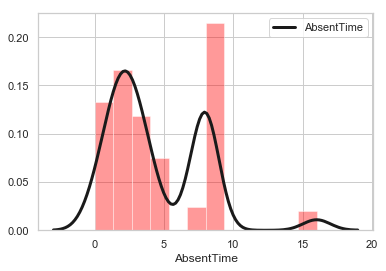

In [166]:
 
sns.distplot(AbsentData['AbsentTime'],color='red',kde_kws={"color": "k", "lw": 3, "label": "AbsentTime"})   


Text(0.5,1,'Outliers Detection in Body Mass Index Attribute')

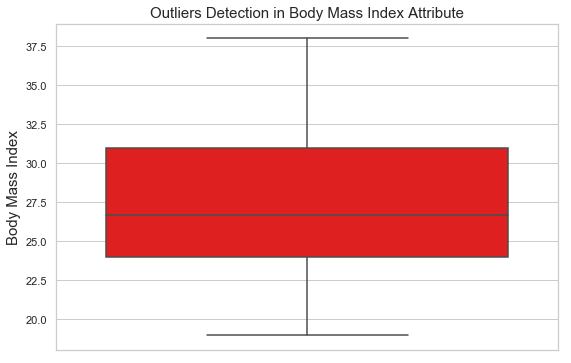

In [210]:
#Detecting outliers for Body Mass Index
sns.set_style("whitegrid") 
fig = plt.figure(1, figsize=(9, 6))
ax = sns.boxplot(x="BodyMassIndex", data=AbsentData,orient="v",color='red')
plt.ylabel("Body Mass Index",fontsize=15)
plt.title("Outliers Detection in Body Mass Index Attribute",fontsize=15)

Text(0.5,1,'Outliers Detection in Height Attribute')

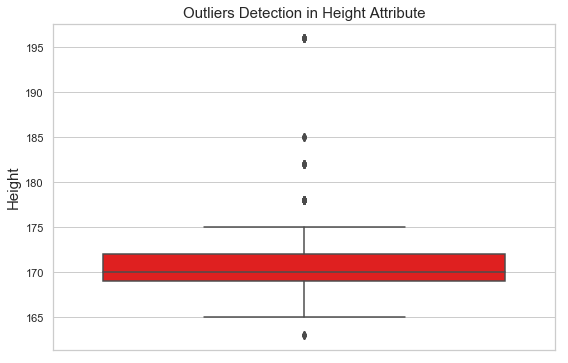

In [211]:
#Detecting outliers for  Height
sns.set_style("whitegrid") 
fig = plt.figure(1, figsize=(9, 6))
ax = sns.boxplot(x="Height", data=AbsentData,orient="v",color='red')
plt.ylabel("Height",fontsize=15)
plt.title("Outliers Detection in Height Attribute",fontsize=15)

164.5
176.5


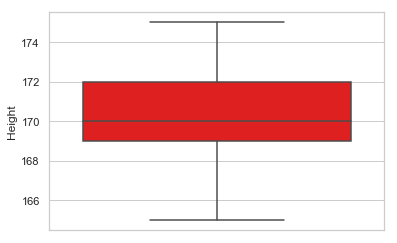

In [212]:
Name = ['Height']
for i in Name:
    q75, q25 = np.percentile(AbsentData.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)

AbsentDataCopy = AbsentData.copy()

AbsentDataCopy = AbsentDataCopy.drop(AbsentDataCopy[AbsentDataCopy.loc[:,i] < min].index)
AbsentDataCopy = AbsentDataCopy.drop(AbsentDataCopy[AbsentDataCopy.loc[:,'Height'] > max].index)

# Boxplot for casual after  aoutlier removal

sns.set(style="whitegrid")
 #tips = sns.load_dataset("tips")
ax = sns.boxplot(x="Height", data=AbsentDataCopy,orient="v",color='red')
AbsentData = AbsentDataCopy


C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


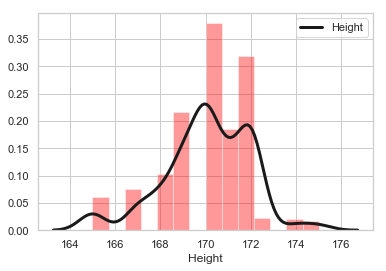

In [213]:
 
sns.distplot(AbsentData['Height'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Height"})   


Text(0.5,1,'Outliers Detection in Weight Attribute')

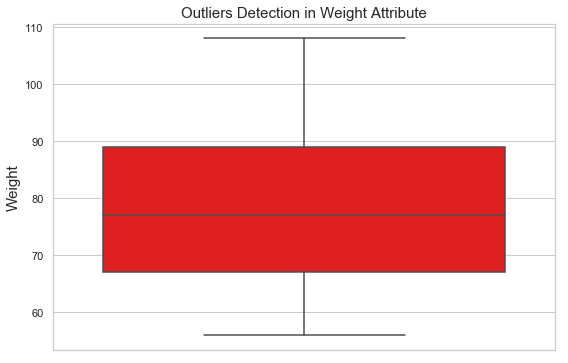

In [214]:
#Detecting outliers for Weight
sns.set_style("whitegrid") 
fig = plt.figure(1, figsize=(9, 6))
ax = sns.boxplot(x="Weight", data=AbsentData,orient="v",color='red')
plt.ylabel("Weight",fontsize=15)
plt.title("Outliers Detection in Weight Attribute",fontsize=15)

Text(0.5,1,'Outliers Detection in Hit Target Attribute')

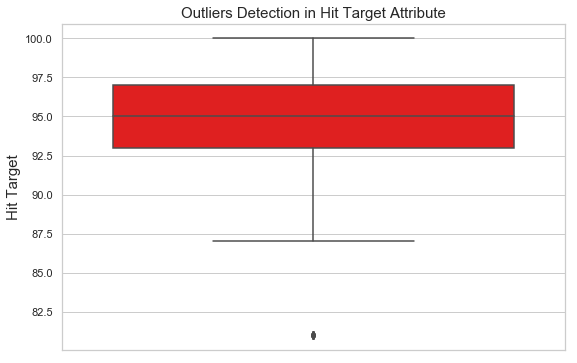

In [215]:
#Detecting outliers for Hit Target
sns.set_style("whitegrid") 
fig = plt.figure(1, figsize=(9, 6))
ax = sns.boxplot(x="HitTarget", data=AbsentData,orient="v",color='red')
plt.ylabel("Hit Target",fontsize=15)
plt.title("Outliers Detection in Hit Target Attribute",fontsize=15)

87.0
103.0


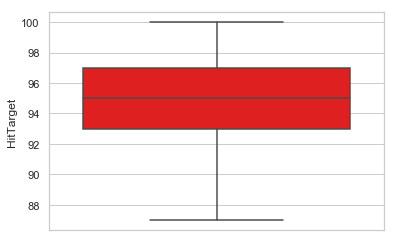

In [216]:
Name = ['HitTarget']
for i in Name:
    q75, q25 = np.percentile(AbsentData.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)

AbsentDataCopy = AbsentData.copy()

AbsentDataCopy = AbsentDataCopy.drop(AbsentDataCopy[AbsentDataCopy.loc[:,i] < min].index)
AbsentDataCopy = AbsentDataCopy.drop(AbsentDataCopy[AbsentDataCopy.loc[:,'HitTarget'] > max].index)

# Boxplot for casual after  aoutlier removal

sns.set(style="whitegrid")
 #tips = sns.load_dataset("tips")
ax = sns.boxplot(x="HitTarget", data=AbsentDataCopy,orient="v",color='red')
AbsentData = AbsentDataCopy


C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


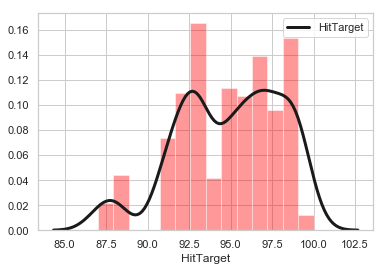

In [217]:
 
sns.distplot(AbsentData['HitTarget'],color='red',kde_kws={"color": "k", "lw": 3, "label": "HitTarget"})   


Text(0.5,1,'Outliers Detection in Expenses Attribute')

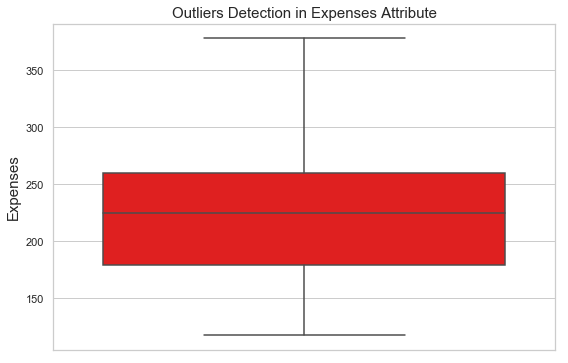

In [218]:
#Detecting outliers for Expenses
sns.set_style("whitegrid") 
fig = plt.figure(1, figsize=(9, 6))
ax = sns.boxplot(x="Expenses", data=AbsentData,orient="v",color='red')
plt.ylabel("Expenses",fontsize=15)
plt.title("Outliers Detection in Expenses Attribute",fontsize=15)

Text(0.5,1,'Outliers Detection in Average Work Load Attribute')

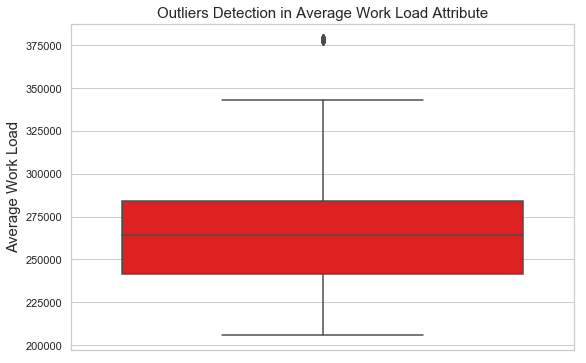

In [219]:
#Detecting outliers for Average Work Load
sns.set_style("whitegrid") 
fig = plt.figure(1, figsize=(9, 6))
ax = sns.boxplot(x="AverageWorkLoad", data=AbsentData,orient="v",color='red')
plt.ylabel("Average Work Load",fontsize=15)
plt.title("Outliers Detection in Average Work Load Attribute",fontsize=15)

177643.5
347863.5


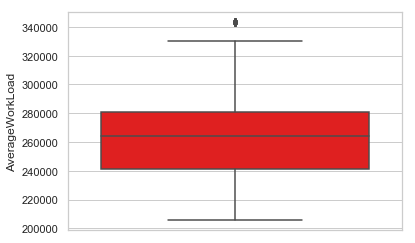

In [220]:
Name = ['AverageWorkLoad']
for i in Name:
    q75, q25 = np.percentile(AbsentData.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)

AbsentDataCopy = AbsentData.copy()

AbsentDataCopy = AbsentDataCopy.drop(AbsentDataCopy[AbsentDataCopy.loc[:,i] < min].index)
AbsentDataCopy = AbsentDataCopy.drop(AbsentDataCopy[AbsentDataCopy.loc[:,'AverageWorkLoad'] > max].index)

# Boxplot for casual after  aoutlier removal

sns.set(style="whitegrid")
 #tips = sns.load_dataset("tips")
ax = sns.boxplot(x="AverageWorkLoad", data=AbsentDataCopy,orient="v",color='red')
AbsentData = AbsentDataCopy


C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


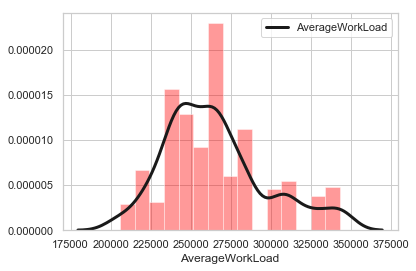

In [221]:
 
sns.distplot(AbsentData['AverageWorkLoad'],color='red',kde_kws={"color": "k", "lw": 3, "label": "AverageWorkLoad"})   


Text(0.5,1,'Outliers Detection in Average Work Load Attribute')

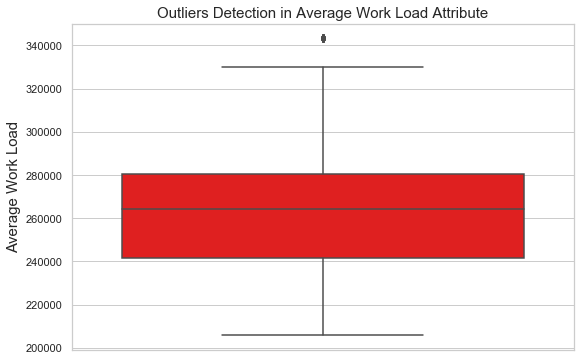

In [222]:
#Ouliers are still present in Average work Load so using box plot method again
#Detecting outliers for Average Work Load
sns.set_style("whitegrid") 
fig = plt.figure(1, figsize=(9, 6))
ax = sns.boxplot(x="AverageWorkLoad", data=AbsentData,orient="v",color='red')
plt.ylabel("Average Work Load",fontsize=15)
plt.title("Outliers Detection in Average Work Load Attribute",fontsize=15)

182866.5
339158.5


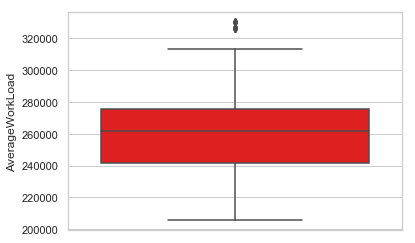

In [223]:
Name = ['AverageWorkLoad']
for i in Name:
    q75, q25 = np.percentile(AbsentData.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)

AbsentDataCopy = AbsentData.copy()

AbsentDataCopy = AbsentDataCopy.drop(AbsentDataCopy[AbsentDataCopy.loc[:,i] < min].index)
AbsentDataCopy = AbsentDataCopy.drop(AbsentDataCopy[AbsentDataCopy.loc[:,'AverageWorkLoad'] > max].index)

# Boxplot for casual after  aoutlier removal

sns.set(style="whitegrid")
 #tips = sns.load_dataset("tips")
ax = sns.boxplot(x="AverageWorkLoad", data=AbsentDataCopy,orient="v",color='red')
AbsentData = AbsentDataCopy


C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


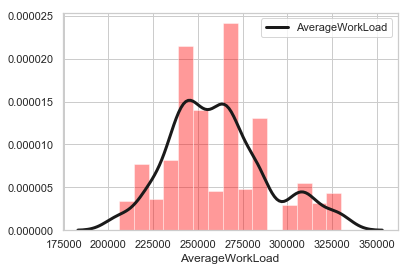

In [224]:
 
sns.distplot(AbsentData['AverageWorkLoad'],color='red',kde_kws={"color": "k", "lw": 3, "label": "AverageWorkLoad"})   


Text(0.5,1,'Outliers Detection in Average Work Load Attribute')

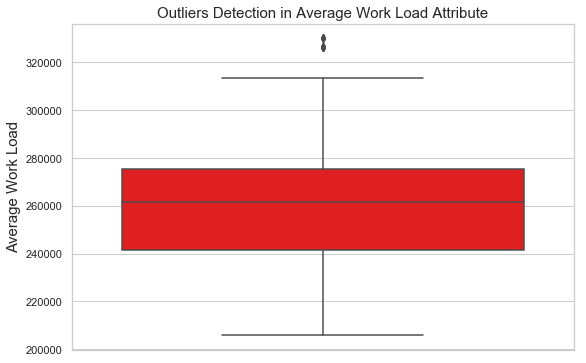

In [225]:
#Ouliers are still present in Average work Load so using box plot method again
#Detecting outliers for Average Work Load
sns.set_style("whitegrid") 
fig = plt.figure(1, figsize=(9, 6))
ax = sns.boxplot(x="AverageWorkLoad", data=AbsentData,orient="v",color='red')
plt.ylabel("Average Work Load",fontsize=15)
plt.title("Outliers Detection in Average Work Load Attribute",fontsize=15)

190722.0
326066.0


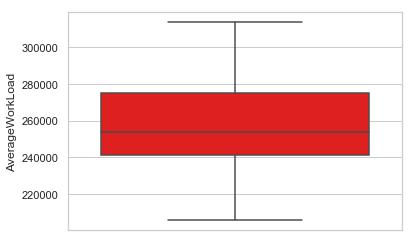

In [226]:
Name = ['AverageWorkLoad']
for i in Name:
    q75, q25 = np.percentile(AbsentData.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)

AbsentDataCopy = AbsentData.copy()

AbsentDataCopy = AbsentDataCopy.drop(AbsentDataCopy[AbsentDataCopy.loc[:,i] < min].index)
AbsentDataCopy = AbsentDataCopy.drop(AbsentDataCopy[AbsentDataCopy.loc[:,'AverageWorkLoad'] > max].index)

# Boxplot for casual after  aoutlier removal

sns.set(style="whitegrid")
 #tips = sns.load_dataset("tips")
ax = sns.boxplot(x="AverageWorkLoad", data=AbsentDataCopy,orient="v",color='red')
AbsentData = AbsentDataCopy


C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


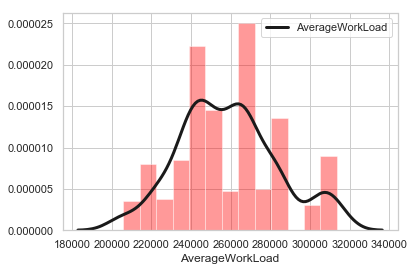

In [227]:
 
sns.distplot(AbsentData['AverageWorkLoad'],color='red',kde_kws={"color": "k", "lw": 3, "label": "AverageWorkLoad"})   


Text(0.5,1,'Outliers Detection in Age Attribute')

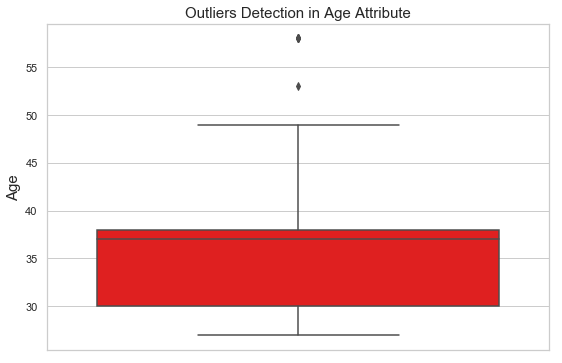

In [228]:
#Detecting outliers for Age
sns.set_style("whitegrid") 
fig = plt.figure(1, figsize=(9, 6))
ax = sns.boxplot(x="Age", data=AbsentData,orient="v",color='red')
plt.ylabel("Age",fontsize=15)
plt.title("Outliers Detection in Age Attribute",fontsize=15)

18.0
50.0


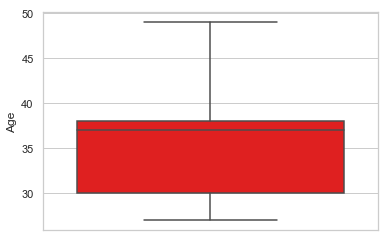

In [229]:
Name = ['Age']
for i in Name:
    q75, q25 = np.percentile(AbsentData.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)

AbsentDataCopy = AbsentData.copy()

AbsentDataCopy = AbsentDataCopy.drop(AbsentDataCopy[AbsentDataCopy.loc[:,i] < min].index)
AbsentDataCopy = AbsentDataCopy.drop(AbsentDataCopy[AbsentDataCopy.loc[:,'Age'] > max].index)

# Boxplot for casual after  aoutlier removal

sns.set(style="whitegrid")
 #tips = sns.load_dataset("tips")
ax = sns.boxplot(x="Age", data=AbsentDataCopy,orient="v",color='red')
AbsentData = AbsentDataCopy


C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


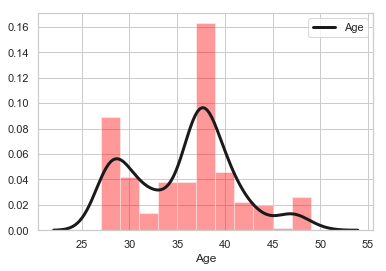

In [230]:
 
sns.distplot(AbsentData['Age'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Age"})   


Text(0.5,1,'Outliers Detection in Service Time Attribute')

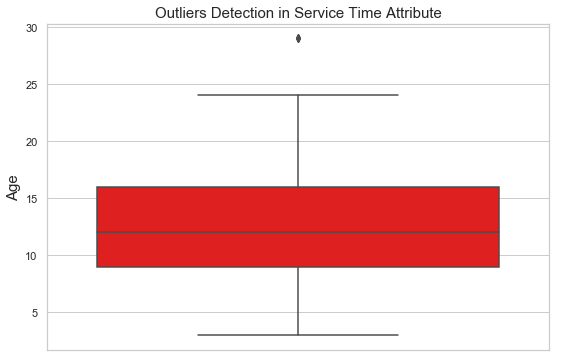

In [231]:
#Detecting outliers for Service Time
sns.set_style("whitegrid") 
fig = plt.figure(1, figsize=(9, 6))
ax = sns.boxplot(x="ServiceTime", data=AbsentData,orient="v",color='red')
plt.ylabel("Age",fontsize=15)
plt.title("Outliers Detection in Service Time Attribute",fontsize=15)

-1.5
26.5


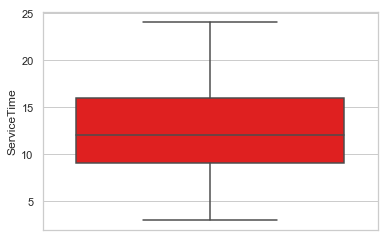

In [232]:
Name = ['ServiceTime']
for i in Name:
    q75, q25 = np.percentile(AbsentData.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)

AbsentDataCopy = AbsentData.copy()

AbsentDataCopy = AbsentDataCopy.drop(AbsentDataCopy[AbsentDataCopy.loc[:,i] < min].index)
AbsentDataCopy = AbsentDataCopy.drop(AbsentDataCopy[AbsentDataCopy.loc[:,'ServiceTime'] > max].index)

# Boxplot for casual after  aoutlier removal

sns.set(style="whitegrid")
 #tips = sns.load_dataset("tips")
ax = sns.boxplot(x="ServiceTime", data=AbsentDataCopy,orient="v",color='red')
AbsentData = AbsentDataCopy


C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


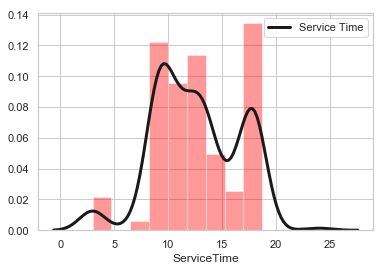

In [233]:
 
sns.distplot(AbsentData['ServiceTime'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Service Time"})   


Text(0.5,1,'Outliers Detection in Resident Distance Attribute')

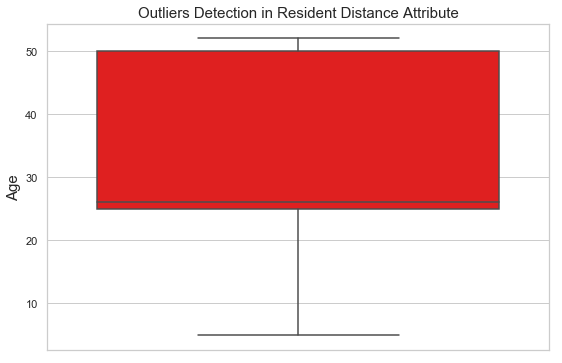

In [234]:
#Detecting outliers for Resident Distance
sns.set_style("whitegrid") 
fig = plt.figure(1, figsize=(9, 6))
ax = sns.boxplot(x="ResidentDistance", data=AbsentData,orient="v",color='red')
plt.ylabel("Age",fontsize=15)
plt.title("Outliers Detection in Resident Distance Attribute",fontsize=15)

In [70]:

AbsentData.head()


Id AbsentReason AbsentMonth WeekDay Season  Expenses  ResidentDistance  \
0  11         26.0         7.0       3      1     289.0              36.0   
2   3         23.0         7.0       4      1     179.0              51.0   
3   7          7.0         7.0       5      1     279.0               5.0   
4  11         23.0         7.0       5      1     289.0              36.0   
5   3         23.0         7.0       6      1     179.0              51.0   

   ServiceTime   Age  AverageWorkLoad     ...      DiscplineFailure Education  \
0         13.0  33.0         239554.0     ...                   0.0       1.0   
2         18.0  38.0         239554.0     ...                   0.0       1.0   
3         14.0  39.0         239554.0     ...                   0.0       1.0   
4         13.0  33.0         239554.0     ...                   0.0       1.0   
5         18.0  38.0         239554.0     ...                   0.0       1.0   

   Son SocialDrinker SocialSmoker  Pet Weight  Height  BodyMassIndex  \
0  2.0           1.0          0.0  1.0   90.0   172.0           30.0   
2  0.0           1.0          0.0  0.0   89.0   170.0           31.0   
3  2.0           1.0          1.0  0.0   68.0   168.0           24.0   
4  2.0           1.0          0.0  1.0   90.0   172.0           30.0   
5  0.0           1.0          0.0  0.0   89.0   170.0           31.0   

   AbsentTime  
0    4.000000  
2    2.000000  
3    4.000000  
4    2.000000  
5    6.977716  

[5 rows x 21 columns]

In [235]:
#Rechecking MIssing values after outlier analysis
AbsentData.isnull().sum()

Id                  0
AbsentReason        0
AbsentMonth         0
WeekDay             0
Season              0
Expenses            0
ResidentDistance    0
ServiceTime         0
Age                 0
AverageWorkLoad     0
HitTarget           0
DiscplineFailure    0
Education           0
Son                 0
SocialDrinker       0
SocialSmoker        0
Pet                 0
Weight              0
Height              0
BodyMassIndex       0
AbsentTime          0
dtype: int64

In [236]:
#Feature Selection
#Selection of numerical feature  based  on pearson corelation 
AbsentDataNumeric = AbsentData.loc[:,['AbsentTime','BodyMassIndex','Height','Age','Weight','HitTarget','Expenses','AverageWorkLoad','ServiceTime','ResidentDistance']]



In [237]:
#Draw  correlation matrix between all  numeric variables and analyse  what are the variables are important

temp = AbsentDataNumeric.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)
temp

C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


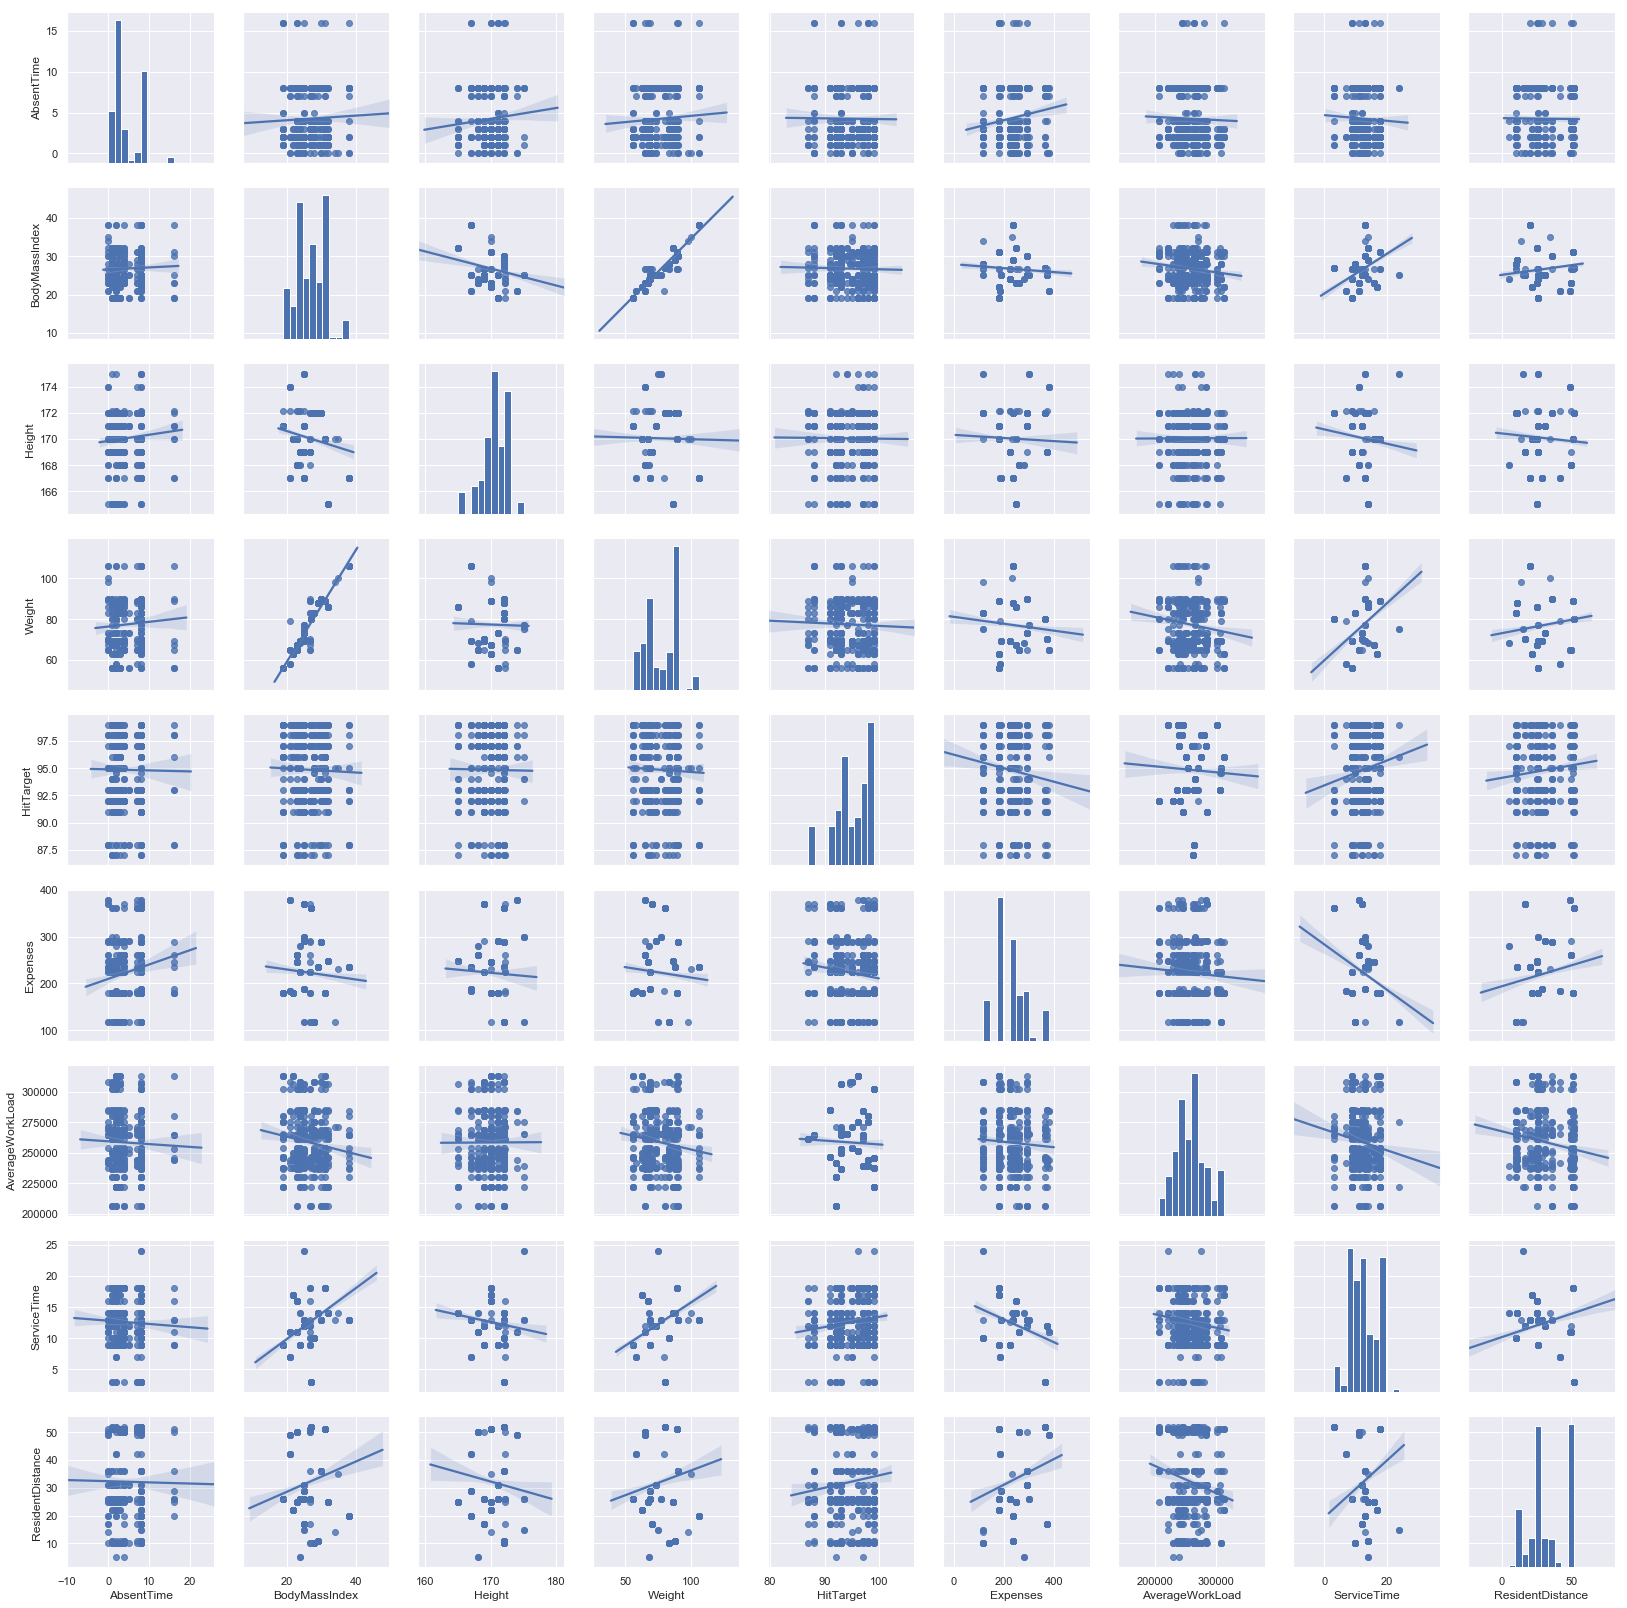

In [238]:
# check relationship with scatter plots
sns.set()
cols = ['AbsentTime','BodyMassIndex','Height','Weight','HitTarget','Expenses','AverageWorkLoad','ServiceTime','ResidentDistance']
sns.pairplot(AbsentDataNumeric[cols], size = 2.5,kind="reg")
plt.show();



In [239]:
#As per scatter plots and above Correlation  graph there is strong relation 
# Independent variable   'Weight' and 'Body Mass Index'
# There is a   poor relation between  Independent variable 'Weight' and dependent  variable 'Absent Time'

# so dropping two variables for feature selection

AbsentDataNumeric = AbsentDataNumeric.loc[:,['BodyMassIndex','Height','HitTarget','Expenses','AverageWorkLoad','Age','ServiceTime','ResidentDistance','AbsentTime']]



In [240]:
AbsentData['AbsentTime'].max()

16.0

In [241]:
AbsentDataNumeric.head()

BodyMassIndex  Height  HitTarget  Expenses  AverageWorkLoad   Age  \
0           30.0   172.0       97.0     289.0         239554.0  33.0   
2           31.0   170.0       97.0     179.0         239554.0  38.0   
3           24.0   168.0       97.0     279.0         239554.0  39.0   
4           30.0   172.0       97.0     289.0         239554.0  33.0   
5           31.0   170.0       97.0     179.0         239554.0  38.0   

   ServiceTime  ResidentDistance  AbsentTime  
0         13.0              36.0    4.000000  
2         18.0              51.0    2.000000  
3         14.0               5.0    4.000000  
4         13.0              36.0    2.000000  
5         18.0              51.0    6.977716

In [242]:
AbsentDataNumeric.shape

(472, 9)

In [243]:
# Feature  Scaling
#Normality Check

cnames = ['BodyMassIndex','Height','HitTarget','Expenses','AverageWorkLoad','Age','ServiceTime','ResidentDistance']
for i in cnames :
    print(i)
    AbsentData[i] = (AbsentData[i] - (AbsentData[i]).min())/(AbsentData[i].max() - (AbsentData[i]).min())
AbsentData.head()

BodyMassIndex
Height
HitTarget
Expenses
AverageWorkLoad
Age
ServiceTime
ResidentDistance


Id AbsentReason AbsentMonth WeekDay Season  Expenses  ResidentDistance  \
0  11         26.0         7.0       3      1  0.657692          0.659574   
2   3         23.0         7.0       4      1  0.234615          0.978723   
3   7          7.0         7.0       5      1  0.619231          0.000000   
4  11         23.0         7.0       5      1  0.657692          0.659574   
5   3         23.0         7.0       6      1  0.234615          0.978723   

   ServiceTime   Age  AverageWorkLoad     ...      DiscplineFailure Education  \
0     0.476190  0.30         0.312568     ...                   0.0       1.0   
2     0.714286  0.55         0.312568     ...                   0.0       1.0   
3     0.523810  0.60         0.312568     ...                   0.0       1.0   
4     0.476190  0.30         0.312568     ...                   0.0       1.0   
5     0.714286  0.55         0.312568     ...                   0.0       1.0   

   Son SocialDrinker SocialSmoker  Pet Weight  Height  BodyMassIndex  \
0  2.0           1.0          0.0  1.0   90.0     0.7       0.578947   
2  0.0           1.0          0.0  0.0   89.0     0.5       0.631579   
3  2.0           1.0          1.0  0.0   68.0     0.3       0.263158   
4  2.0           1.0          0.0  1.0   90.0     0.7       0.578947   
5  0.0           1.0          0.0  0.0   89.0     0.5       0.631579   

   AbsentTime  
0    4.000000  
2    2.000000  
3    4.000000  
4    2.000000  
5    6.977716  

[5 rows x 21 columns]

In [244]:
#Making Copy of AbsentData before training models
AbsentData1 = AbsentData

In [245]:
AbsentData1.head()

Id AbsentReason AbsentMonth WeekDay Season  Expenses  ResidentDistance  \
0  11         26.0         7.0       3      1  0.657692          0.659574   
2   3         23.0         7.0       4      1  0.234615          0.978723   
3   7          7.0         7.0       5      1  0.619231          0.000000   
4  11         23.0         7.0       5      1  0.657692          0.659574   
5   3         23.0         7.0       6      1  0.234615          0.978723   

   ServiceTime   Age  AverageWorkLoad     ...      DiscplineFailure Education  \
0     0.476190  0.30         0.312568     ...                   0.0       1.0   
2     0.714286  0.55         0.312568     ...                   0.0       1.0   
3     0.523810  0.60         0.312568     ...                   0.0       1.0   
4     0.476190  0.30         0.312568     ...                   0.0       1.0   
5     0.714286  0.55         0.312568     ...                   0.0       1.0   

   Son SocialDrinker SocialSmoker  Pet Weight  Height  BodyMassIndex  \
0  2.0           1.0          0.0  1.0   90.0     0.7       0.578947   
2  0.0           1.0          0.0  0.0   89.0     0.5       0.631579   
3  2.0           1.0          1.0  0.0   68.0     0.3       0.263158   
4  2.0           1.0          0.0  1.0   90.0     0.7       0.578947   
5  0.0           1.0          0.0  0.0   89.0     0.5       0.631579   

   AbsentTime  
0    4.000000  
2    2.000000  
3    4.000000  
4    2.000000  
5    6.977716  

[5 rows x 21 columns]

In [246]:
#Feature Selection before Model development
#Dropping Feeling Temperatue becasue Temperature and Feeling Temeprature are higly correlated.
#Dropping Humidity because has low correlation related to Rented Bikes
#Date Variable is no use and will create problem while training models. So i am dropping it.

AbsentData = AbsentData.drop(['Weight'],axis=1)

In [247]:
AbsentData.head()

Id AbsentReason AbsentMonth WeekDay Season  Expenses  ResidentDistance  \
0  11         26.0         7.0       3      1  0.657692          0.659574   
2   3         23.0         7.0       4      1  0.234615          0.978723   
3   7          7.0         7.0       5      1  0.619231          0.000000   
4  11         23.0         7.0       5      1  0.657692          0.659574   
5   3         23.0         7.0       6      1  0.234615          0.978723   

   ServiceTime   Age  AverageWorkLoad  HitTarget DiscplineFailure Education  \
0     0.476190  0.30         0.312568   0.833333              0.0       1.0   
2     0.714286  0.55         0.312568   0.833333              0.0       1.0   
3     0.523810  0.60         0.312568   0.833333              0.0       1.0   
4     0.476190  0.30         0.312568   0.833333              0.0       1.0   
5     0.714286  0.55         0.312568   0.833333              0.0       1.0   

   Son SocialDrinker SocialSmoker  Pet  Height  BodyMassIndex  AbsentTime  
0  2.0           1.0          0.0  1.0     0.7       0.578947    4.000000  
2  0.0           1.0          0.0  0.0     0.5       0.631579    2.000000  
3  2.0           1.0          1.0  0.0     0.3       0.263158    4.000000  
4  2.0           1.0          0.0  1.0     0.7       0.578947    2.000000  
5  0.0           1.0          0.0  0.0     0.5       0.631579    6.977716

In [248]:
#Splitting Target varible from the AbsentData
AbsentDataTarget = AbsentData['AbsentTime']
AbsentDataIndependent = AbsentData.drop(['AbsentTime','Id'],axis=1)

In [85]:
AbsentDataIndependent

AbsentReason AbsentMonth WeekDay Season  Expenses  ResidentDistance  \
0           26.0         7.0       3      1  0.657692          0.659574   
2           23.0         7.0       4      1  0.234615          0.978723   
3            7.0         7.0       5      1  0.619231          0.000000   
4           23.0         7.0       5      1  0.657692          0.659574   
5           23.0         7.0       6      1  0.234615          0.978723   
7           23.0         7.0       6      1  0.546154          0.957447   
9           22.0         7.0       2      1  0.450000          0.127660   
10           1.0         7.0       2      1  0.546154          0.957447   
11           1.0         7.0       3      1  0.546154          0.957447   
12          11.0         7.0       4      1  0.546154          0.957447   
13          11.0         7.0       4      1  0.234615          0.978723   
14          23.0         7.0       4      1  0.234615          0.978723   
15          14.0         7.0       6      1  0.492308          0.425532   
17          21.0         7.0       2      1  0.234615          0.978723   
18          11.0         7.0       5      1  0.273077          0.510638   
19          23.0         8.0       4      1  0.500000          0.425532   
21          11.0         8.0       2      1  0.234615          0.978723   
23          28.0         8.0       6      1  0.546154          0.957447   
24          18.0         8.0       2      1  0.657692          0.659574   
25          25.0         8.0       2      1  0.934615          1.000000   
26          23.0         8.0       3      1  0.657692          0.659574   
28          18.0         8.0       4      1  0.657692          0.659574   
29          23.0         8.0       6      1  0.234615          0.978723   
30          18.0         8.0       2      1  0.234615          0.978723   
34          23.0         8.0       2      1  0.234615          0.978723   
35          23.0         8.0       2      1  0.934615          1.000000   
36          24.0         8.0       3      1  0.657692          0.659574   
37          11.0         8.0       5      1  0.665385          0.957447   
39          23.0         8.0       6      1  0.546154          0.957447   
40          23.0         9.0       3      1  0.253846          0.787234   
..           ...         ...     ...    ...       ...               ...   
694         22.0         5.0       4      3  0.665385          0.553191   
695         10.0         5.0       4      3  0.234615          0.361702   
696          6.0         5.0       4      3  0.411538          0.446809   
699         28.0         5.0       5      3  0.665385          0.553191   
700         27.0         5.0       6      3  0.234615          0.446809   
701          7.0         5.0       2      3  0.934615          1.000000   
703         25.0         5.0       6      3  0.234615          0.361702   
705         11.0         5.0       2      3  0.411538          0.446809   
706          7.0         6.0       4      3  0.000000          0.212766   
707         27.0         6.0       4      3  0.234615          0.446809   
708         26.0         6.0       6      3  0.000000          0.106383   
709         10.0         6.0       4      3  0.000000          0.106383   
710         22.0         6.0       5      3  1.000000          0.936170   
713         27.0         6.0       6      3  0.234615          0.446809   
717         13.0         6.0       5      3  0.234615          0.446809   
718         28.0         6.0       5      3  0.665385          0.553191   
719         13.0         6.0       2      1  0.234615          0.446809   
720         25.0         6.0       2      1  0.000000          0.106383   
722          8.0         6.0       6      1  0.000000          0.106383   
723         10.0         6.0       4      1  0.000000          0.106383   
725         26.0         7.0       4      1  0.450000          0.319149   
728         28.0         7.0 

In [86]:
AbsentDataTarget

0      0.250000
2      0.125000
3      0.250000
4      0.125000
5      0.436107
7      0.250000
9      0.500000
10     0.500000
11     0.500000
12     0.500000
13     0.062500
14     0.250000
15     0.436107
17     0.500000
18     0.500000
19     0.125000
21     0.062500
23     0.250000
24     0.500000
25     0.437500
26     0.062500
28     0.500000
29     0.125000
30     0.500000
34     0.125000
35     0.062500
36     0.500000
37     0.250000
39     0.250000
40     0.125000
         ...   
694    0.500000
695    0.500000
696    0.187500
699    0.125000
700    0.125000
701    0.500000
703    0.500000
705    0.062500
706    0.500000
707    0.187500
708    0.500000
709    0.500000
710    0.500000
713    0.125000
717    0.125000
718    0.125000
719    0.187500
720    0.187500
722    0.125000
723    0.187500
725    0.250000
728    0.250000
730    1.000000
731    0.125000
732    0.500000
733    0.500000
735    0.500000
736    0.250000
737    0.000000
738    0.000000
Name: AbsentTime, Length

In [249]:
#Splitting DataSet for Training and Testing Purpose
X_Train,X_Test,Y_Train,Y_Test = train_test_split(AbsentDataIndependent,AbsentDataTarget,test_size=0.4)

In [250]:
#Training Decision tree
DecisionTree = DecisionTreeRegressor(max_depth=10,random_state=0)
DecisionTree.fit(X_Train,Y_Train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [251]:
Score = DecisionTree.score(X_Train,Y_Train)
print('Coefficient of determination R^2 of the prediction.:',Score)
#Apply model on test data
Y_Predictions = DecisionTree.predict(X_Test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_Test, Y_Predictions))
#Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(Y_Test, Y_Predictions))

Coefficient of determination R^2 of the prediction.: 0.9876971692603179
Mean squared error: 16.66
Test Variance score: -0.86


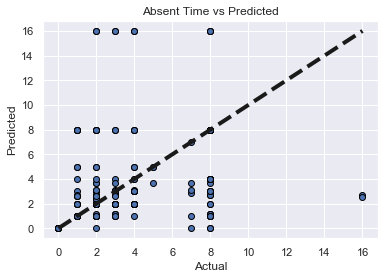

In [252]:
#So let's run the model against the test data
fig, ax = plt.subplots()
ax.scatter(Y_Test,Y_Predictions, edgecolors=(0, 0, 0))
ax.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Absent Time vs Predicted")
plt.show()

In [253]:
# Calculating RMSE for training data to check for over fitting
TrainPrediction = DecisionTree.predict(X_Train)
RMSETrain = np.sqrt(mean_squared_error( Y_Train,TrainPrediction))

# Calculating RMSE for test data to check accuracy
TestPrediction = DecisionTree.predict(X_Test)
RMSETest = np.sqrt(mean_squared_error( Y_Test,TestPrediction))

print("Root Mean Squared Error For Training data = "+str(RMSETrain))
print("Root Mean Squared Error For Test data = "+str(RMSETest))
print("R^2 Score(coefficient of determination) = "+str(r2_score(Y_Test, Y_Predictions)))

Root Mean Squared Error For Training data = 0.3661013953060991
Root Mean Squared Error For Test data = 4.081964514371247
R^2 Score(coefficient of determination) = -0.8626588562688697


In [255]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
RandomForest = RandomForestRegressor(n_estimators=1000, random_state=100)
RandomForest.fit(X_Train,Y_Train)
from sklearn.metrics import mean_squared_error, r2_score
Score = RandomForest.score(X_Train,Y_Train)
print('Coefficient of determination R^2 of the prediction.:',Score)
#Apply model on test data
Y_Predictions = RandomForest.predict(X_Test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_Test, Y_Predictions))
#Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(Y_Test, Y_Predictions))


Coefficient of determination R^2 of the prediction.: 0.9092741023650686
Mean squared error: 7.72
Test Variance score: 0.14


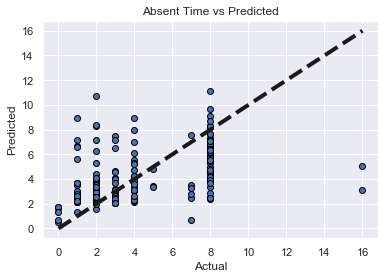

In [256]:
#let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(Y_Test,Y_Predictions, edgecolors=(0, 0, 0))
ax.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Absent Time vs Predicted")
plt.show()

In [257]:
Score = RandomForest.score(X_Train,Y_Train)
print('Coefficient of determination R^2 of the prediction.:',Score)
#Apply model on test data
Y_Predictions = RandomForest.predict(X_Test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_Test, Y_Predictions))
#Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(Y_Test, Y_Predictions))

Coefficient of determination R^2 of the prediction.: 0.9092741023650686
Mean squared error: 7.72
Test Variance score: 0.14


In [258]:
#Inspecting Feature Importance for Random Forest
FeatureImportance = pd.DataFrame(RandomForest.feature_importances_,
                                   index = X_Train.columns,
                                    columns=['Importance']).sort_values('Importance', ascending=False)
FeatureImportance

Importance
AbsentReason        0.305554
DiscplineFailure    0.087296
HitTarget           0.085551
WeekDay             0.079034
AbsentMonth         0.064486
AverageWorkLoad     0.058267
BodyMassIndex       0.044149
ResidentDistance    0.043822
Height              0.039961
Age                 0.039534
Son                 0.038288
Expenses            0.036876
ServiceTime         0.021593
Season              0.020836
Pet                 0.009659
Education           0.009472
SocialDrinker       0.009310
SocialSmoker        0.006311

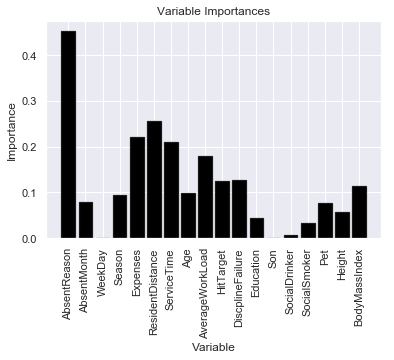

In [259]:
Imp = list(RandomForest.feature_importances_)
# list of x locations for plotting
temp = fs.mutual_info_regression(X_Train,Y_Train)
X_Values = list(range(len(fs.mutual_info_regression(X_Train,Y_Train))))
# Make a bar chart
plt.bar(X_Values,temp, orientation = 'vertical', color = 'black', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(X_Values, X_Train, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [260]:
#From the above graph is stating  that  only  few features are important to decide the  accuracy of the model
#wil check our model accuracy  by reducing features

X_Train1 = X_Train[['AbsentReason','AbsentMonth','Season','Expenses','ResidentDistance','ServiceTime','Age','AverageWorkLoad','HitTarget','DiscplineFailure','Height','BodyMassIndex','Pet','Education']]
X_Test1 = X_Test[['AbsentReason','AbsentMonth','Season','Expenses','ResidentDistance','ServiceTime','Age','AverageWorkLoad','HitTarget','DiscplineFailure','Height','BodyMassIndex','Pet','Education']]

# Build random forest model

RandomForest1= RandomForestRegressor(n_estimators=1000, random_state=100)
RandomForest1.fit(X_Train1,Y_Train)
# Predict the model using predict funtion
Y_Predictions= RandomForest1.predict(X_Test1)

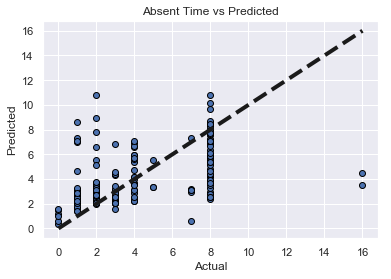

In [261]:
#let's run the model against the test data

fig, ax = plt.subplots()
ax.scatter(Y_Test,Y_Predictions, edgecolors=(0, 0, 0))
ax.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Absent Time vs Predicted")
plt.show()

In [262]:
Score = RandomForest1.score(X_Train1,Y_Train)
print('Coefficient of determination R^2 of the prediction.:',Score)
#Apply model on test data
Y_Predictions = RandomForest1.predict(X_Test1)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_Test, Y_Predictions))
#Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(Y_Test, Y_Predictions))

Coefficient of determination R^2 of the prediction.: 0.8680807464275466
Mean squared error: 7.33
Test Variance score: 0.18


In [263]:
X_Train.corr()

Expenses  ResidentDistance  ServiceTime       Age  \
Expenses          1.000000          0.193962    -0.320648 -0.195827   
ResidentDistance  0.193962          1.000000     0.262642 -0.040256   
ServiceTime      -0.320648          0.262642     1.000000  0.679095   
Age              -0.195827         -0.040256     0.679095  1.000000   
AverageWorkLoad  -0.073145         -0.180766    -0.121592 -0.122509   
HitTarget        -0.142387          0.096876     0.123110  0.022770   
Height           -0.011694         -0.064288    -0.126608 -0.224861   
BodyMassIndex    -0.083633          0.181203     0.436236  0.505512   

                  AverageWorkLoad  HitTarget    Height  BodyMassIndex  
Expenses                -0.073145  -0.142387 -0.011694      -0.083633  
ResidentDistance        -0.180766   0.096876 -0.064288       0.181203  
ServiceTime             -0.121592   0.123110 -0.126608       0.436236  
Age                     -0.122509   0.022770 -0.224861       0.505512  
AverageWorkLoad          1.000000  -0.031330 -0.002632      -0.039875  
HitTarget               -0.031330   1.000000  0.028846      -0.064968  
Height                  -0.002632   0.028846  1.000000      -0.180138  
BodyMassIndex           -0.039875  -0.064968 -0.180138       1.000000

In [264]:
#Linear Regression Model
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_Train,Y_Train)
Score = LinearRegressionModel.score(X_Train,Y_Train)
print('Coefficient of determination R^2 of the prediction.:',Score)
#Apply model on test data
Y_Predictions = LinearRegressionModel.predict(X_Test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_Test, Y_Predictions))
#Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(Y_Test, Y_Predictions))

Coefficient of determination R^2 of the prediction.: 0.23564707750121983
Mean squared error: 7.30
Test Variance score: 0.18


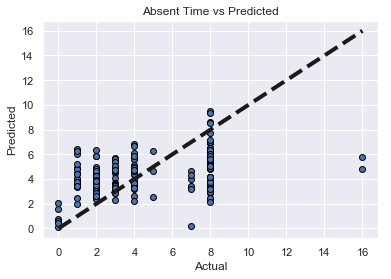

In [265]:
#let's run the model against the test data

fig, ax = plt.subplots()
ax.scatter(Y_Test,Y_Predictions, edgecolors=(0, 0, 0))
ax.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Absent Time vs Predicted")
plt.show()

In [266]:
#Predictions for future is 
Y_Predictions

array([3.2598191 , 0.74211458, 4.60775235, 5.0077863 , 4.36705896,
       3.14010396, 8.61781191, 6.40472899, 2.63933828, 4.64618259,
       5.69945791, 6.03879848, 3.40182202, 0.62424746, 4.52013439,
       6.91534005, 6.47654062, 2.60052073, 3.62084758, 4.07807486,
       3.38843042, 4.9149837 , 4.05383514, 5.65012822, 6.09483486,
       3.46472747, 4.38970786, 5.82986317, 3.06975279, 4.09338699,
       0.09477648, 2.60121225, 2.96070373, 3.47404724, 5.86079292,
       2.39970449, 5.36762447, 3.36283629, 6.27031936, 3.46849451,
       4.44208791, 6.27583715, 3.7037963 , 4.43939792, 4.62343112,
       7.00449287, 3.6245249 , 5.71014803, 3.82020508, 4.02172538,
       3.96343336, 3.56695959, 4.46212433, 3.01354269, 4.18763011,
       2.8751138 , 5.7335907 , 4.22731147, 3.70592329, 5.57274925,
       3.57562119, 6.46290244, 3.94817692, 2.84774169, 7.73926814,
       3.09601754, 5.10158159, 4.87409453, 3.08415322, 3.11453509,
       4.84354531, 4.38878489, 2.40816971, 2.97797173, 4.06506

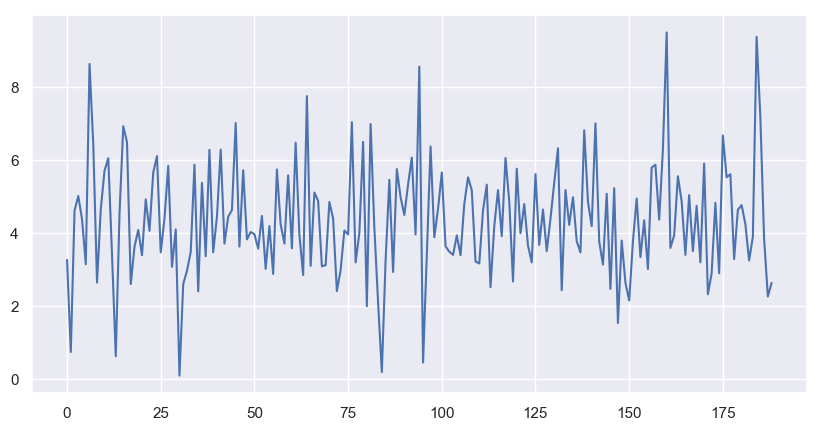

In [282]:
#Grapgh of Predictions 
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(Y_Predictions)

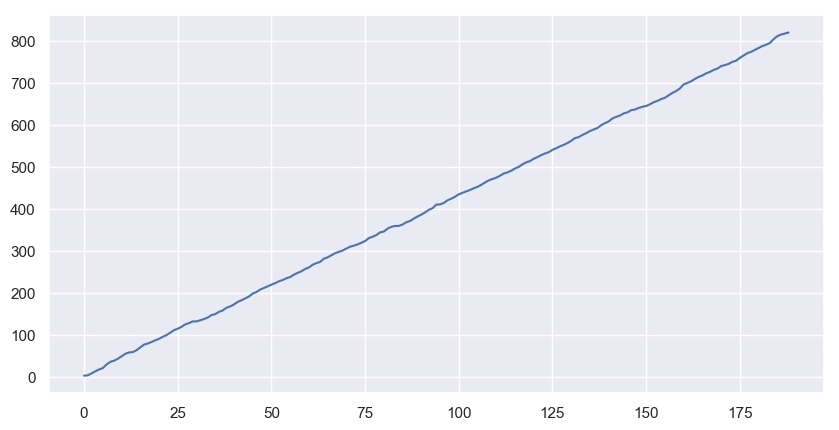

In [301]:
#Time Series Problem for Predictions
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
ts = pd.Series(Y_Predictions)
ts = ts.cumsum()
ts.plot()